# Exploratory Data Analysis

## Reading Files into Python

In [1]:
# importing required libraries
import os
import numpy as np
import pandas as pd
from math import ceil

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action= 'ignore')
sns.set_style('white')
#%matplotlib.inline


In [2]:
# importing data
os.chdir('F:\\Data Science\\Analytics Vidhya\\Online\\Course 5 - Statistics and EDA\\Assignment- NYC trip duration')
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
# first 5 rows using head function 
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
# last 5 rows using tail function 
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [5]:
# shape of the data 
print("The NYC-trip duration data have {} rows and {} columns.".format(data.shape[0],data.shape[1]))

The NYC-trip duration data have 729322 rows and 11 columns.


In [6]:
# All the columns names present in the data 
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

## Variable Identification and Typecasting

In [7]:
# checking datatypes of all the variables 
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Summary:
  
*    **id** are the unique identifier for the each trip. Should be converted to **string or object type**.
*    **vendor_id** indicates the provider associated with the trip. Should be converted to **object type**.
*    **pickup_datetime** indicates the date and time when the meter was engaged. Should be coverted to **datetime variable**.
*    **dropoff_datetime** indicates the date and time when the meter was disengaged. Should be converted to **datetime     variable**.
*    **passenger_count** indicates the number of passengers in the vehicle (driver entered value). Should be converted to **object type** (ordinal variable).
*    **pickup_longitude** indicates the longitude where the meter was engaged. Correctly represted as **float type**.
*    **pickup_latitude** indicates the latitude where the meter was engaged. Correctly represted as **float type**.
*    **dropoff_longitude** indicates the longitude where the meter was disengaged. Correctly represted as **float type**.
*    **dropoff_latitude** indicates the latitude where the meter was disengaged. Correctly represted as **float type**.
*    **store_and_fwd_flag** indicates the whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip). Correctly represented as **object type**.
*    **trip_duration** indicates the duration of the trip in seconds. Correctly represented as **int type**.

In [8]:
# converting the variables to respected data types 
data['id']        = data['id'].astype(str)
data['vendor_id'] = data['vendor_id'].astype('category')
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])
data['passenger_count'] = data['passenger_count'].astype('category')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')


In [9]:
# Checking the datatypes 
data.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count             category
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

### datetime Data Type

In [10]:
# function to extract new variables from datetime variables

def dt_feature_extraction(data,var):
    
    # creating an instance of datetime variable
    date = pd.DatetimeIndex(data[var])
    
    # extracting new feature from datetime variables 
    
    # day of year variable
    data['doy_'+data[var].name] = date.dayofyear
    
    # week of year variable
    data['woy_'+data[var].name] = date.weekofyear
    
    # month of year variable
    data['moy_'+data[var].name] = date.month
    
    # day of week variable 
    data['dow_'+data[var].name] = date.dayofweek
    
    # hour of day variable
    data['hod_'+data[var].name] = date.hour
    
    


In [11]:
# extracting new columns for 'pickup_datetime'
dt_feature_extraction(data,'pickup_datetime')

In [12]:
# extracting new columns for 'dropoff_datetime'
dt_feature_extraction(data,'dropoff_datetime')

In [13]:
# Checking the head of datat with new variables added
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,doy_pickup_datetime,woy_pickup_datetime,moy_pickup_datetime,dow_pickup_datetime,hod_pickup_datetime,doy_dropoff_datetime,woy_dropoff_datetime,moy_dropoff_datetime,dow_dropoff_datetime,hod_dropoff_datetime
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,60,9,2,0,16,60,9,2,0,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,71,10,3,4,23,71,10,3,4,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,52,7,2,6,17,52,7,2,6,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,5,1,1,1,9,5,1,1,1,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,48,7,2,2,6,48,7,2,2,6


## Univeriate Analysis: Numerical Variables

In [14]:
# Numerical Datatypes
data.select_dtypes(include=['int64','float64']).dtypes

pickup_longitude        float64
pickup_latitude         float64
dropoff_longitude       float64
dropoff_latitude        float64
trip_duration             int64
doy_pickup_datetime       int64
woy_pickup_datetime       int64
moy_pickup_datetime       int64
dow_pickup_datetime       int64
hod_pickup_datetime       int64
doy_dropoff_datetime      int64
woy_dropoff_datetime      int64
moy_dropoff_datetime      int64
dow_dropoff_datetime      int64
hod_dropoff_datetime      int64
dtype: object

In [15]:
# segregating the variables into groups
geographic_info = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
trip_duration   = ['trip_duration'] 
pickup_datetime = ['doy_pickup_datetime','woy_pickup_datetime','moy_pickup_datetime','dow_pickup_datetime','hod_pickup_datetime']
dropoff_datetime = ['doy_dropoff_datetime','woy_dropoff_datetime','moy_dropoff_datetime','dow_dropoff_datetime','hod_dropoff_datetime']

In [16]:




# function for easy and efficient analysis of numerical variables
def UVA_numerical(data, var_group):
    
    # Specifing the size of the canvas
    size = len(var_group)
    plt.figure(figsize=(5*size,4*size),dpi=100)
    
    # loop for printing/ploting the descriptive statistics of the numerical variables 
    for j,i in enumerate(var_group):
        
        # calculating the descriptive statistics 
        mini = data[i].min()
        maxi = data[i].max()
        ran  = maxi - mini 
        mean = data[i].mean()
        med  = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        
        # Calculating the points of standerd daviation 
        points = mean-st_dev, mean+st_dev
        
        # Ploting the variables with every informaton 
        plt.subplot(ceil(size/2),1 if size==1 else 2,j+1)
        sns.kdeplot(data[i],shade=True)
        sns.lineplot(points,[0,0],color='black',label='std_dev')
        sns.scatterplot([mini,maxi],[0,0],color='red',label='min\max')
        sns.scatterplot(mean,[0],color='blue',label='mean')
        sns.scatterplot(med,[0],color='green',label='median')
        plt.xlabel("{}".format(i),fontsize=(size*5+5))
        plt.ylabel('density',fontsize=(size*5+5))
        plt.tight_layout()
        plt.title('std_dev= {}; kurtosis= {}; skew= {};\nmean= {}; median= {}; range = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                 round(kurt,2),
                                                                                                 round(skew,2),
                                                                                                 round(mean,2),
                                                                                                 round(med,2),
                                                                                                 (round(mini,2),round(maxi,2),round(ran,2))),fontsize=size*4+3)
    

### geografic_info

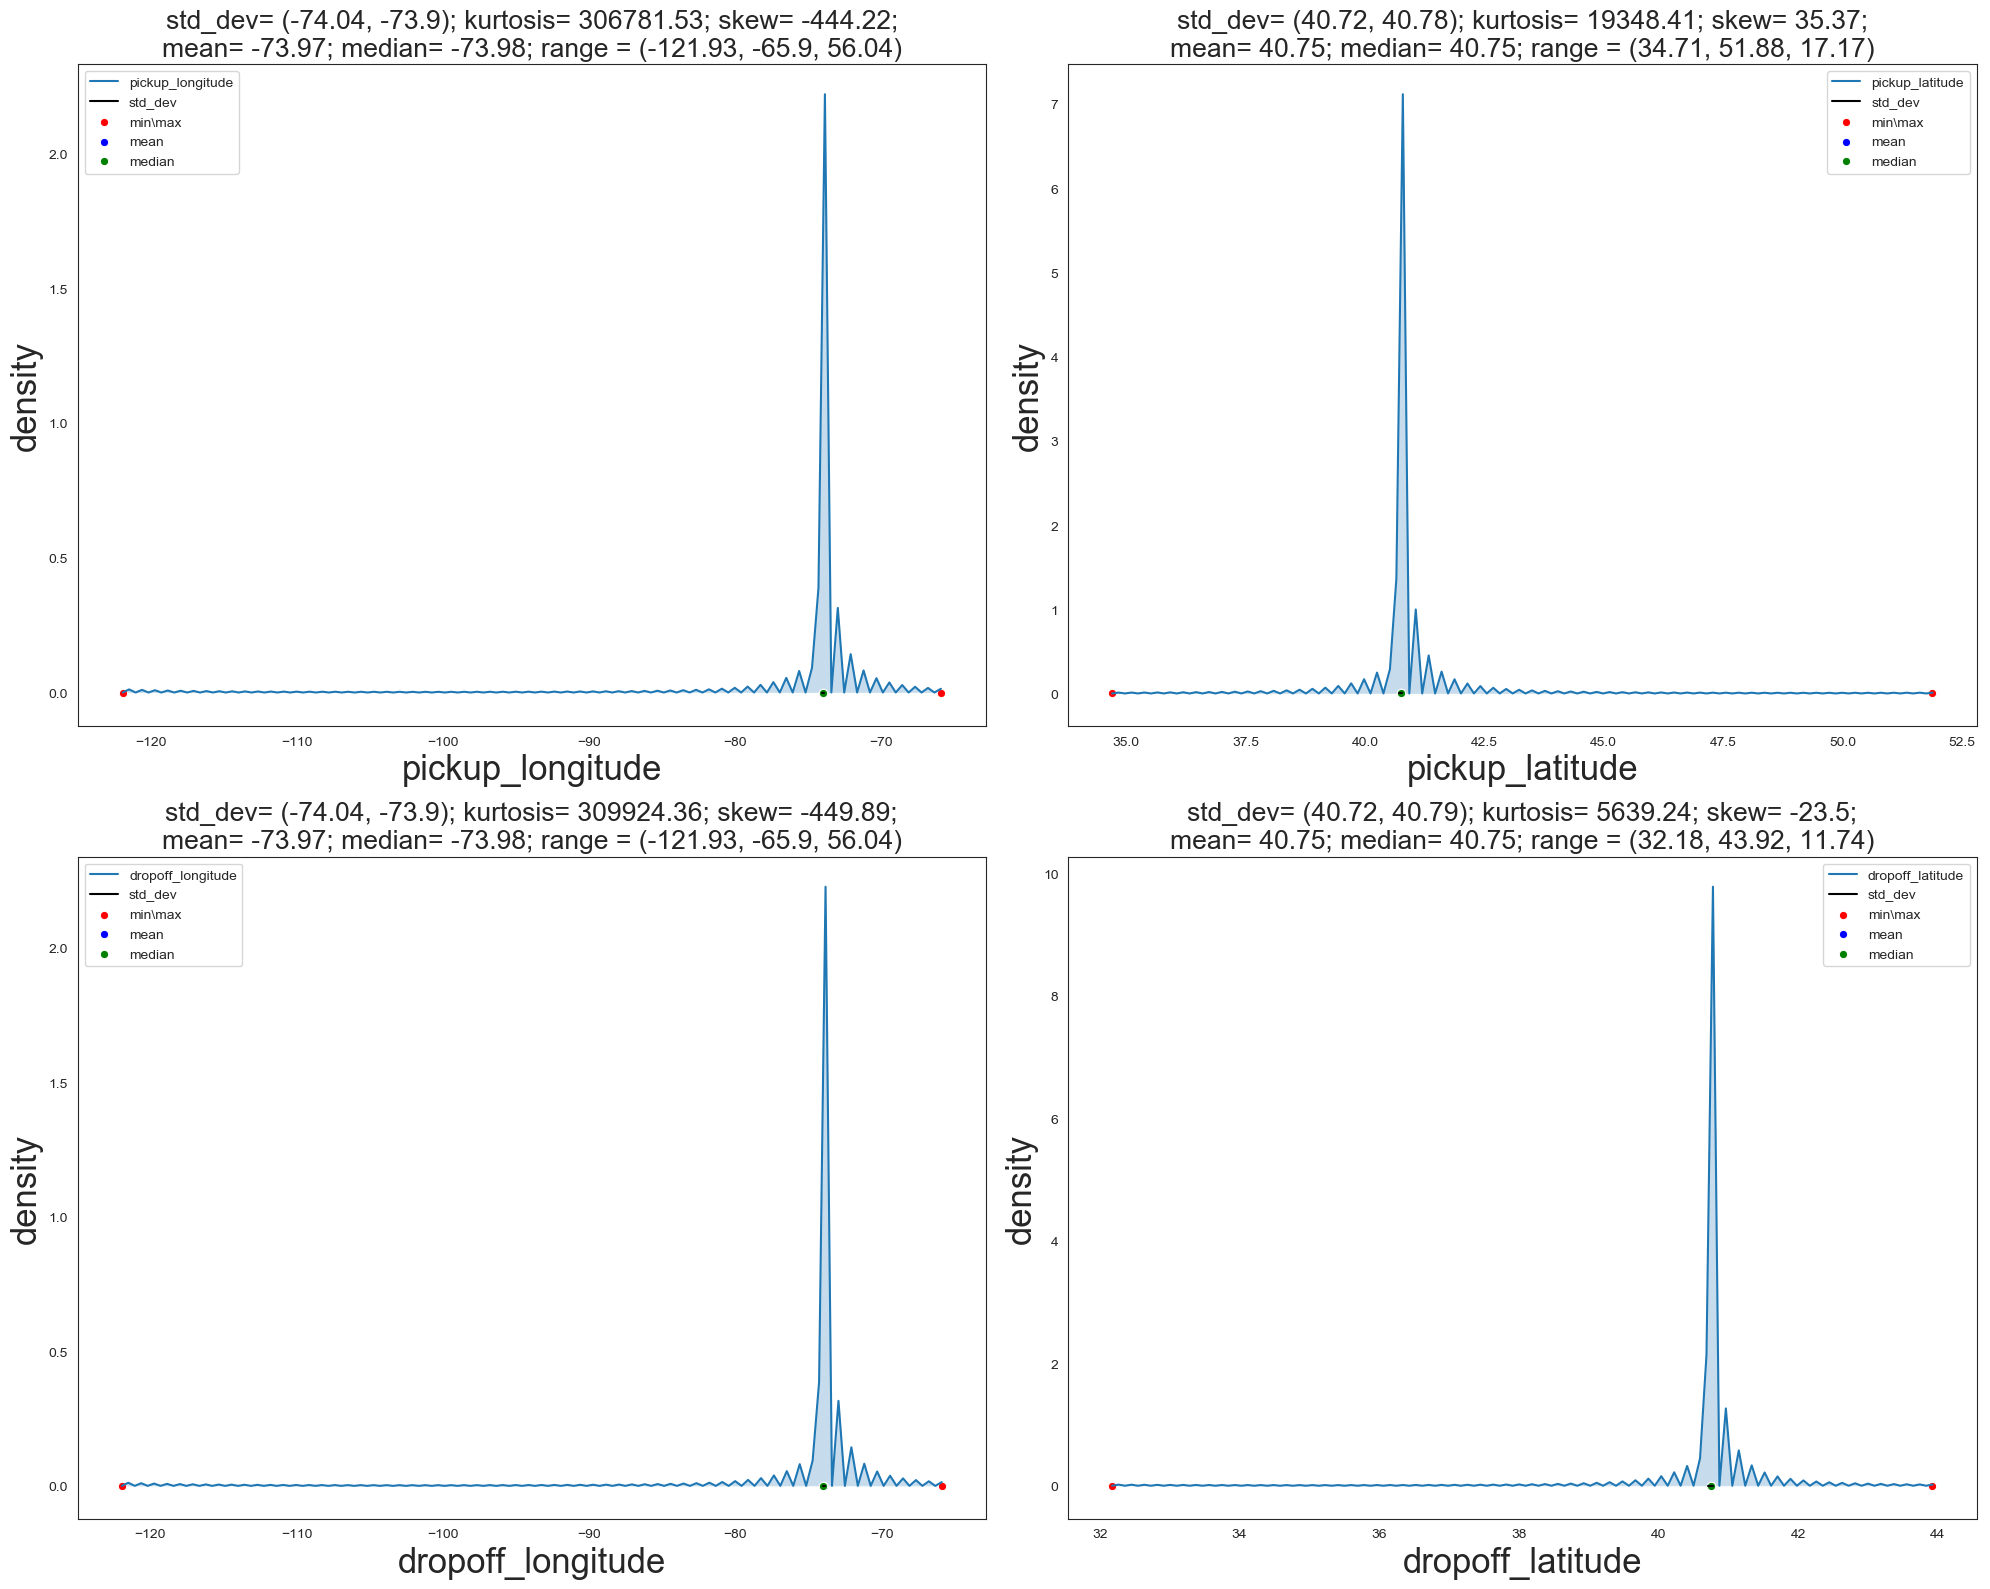

In [17]:
UVA_numerical(data,geographic_info)

#### Summary 
* Conserdering the kurtosis and skewness of the graph, ourliers are present.
* Mean and Median of all the variables are either equal or apporx. equal.
* Standerd deviation of all the variables are close to zero. Most of the points are present very very close to each other.
* The distribution for pickup_longitude and dropoff_longitude is exactly similar. Only the latitudes are changing slightly before and after the cab riden.
* Does these extreme values in longititude and latitude signifies longer duration of cab rides or is this just random?

### pickup_datetime

In [18]:
pickup_datetime

['doy_pickup_datetime',
 'woy_pickup_datetime',
 'moy_pickup_datetime',
 'dow_pickup_datetime',
 'hod_pickup_datetime']

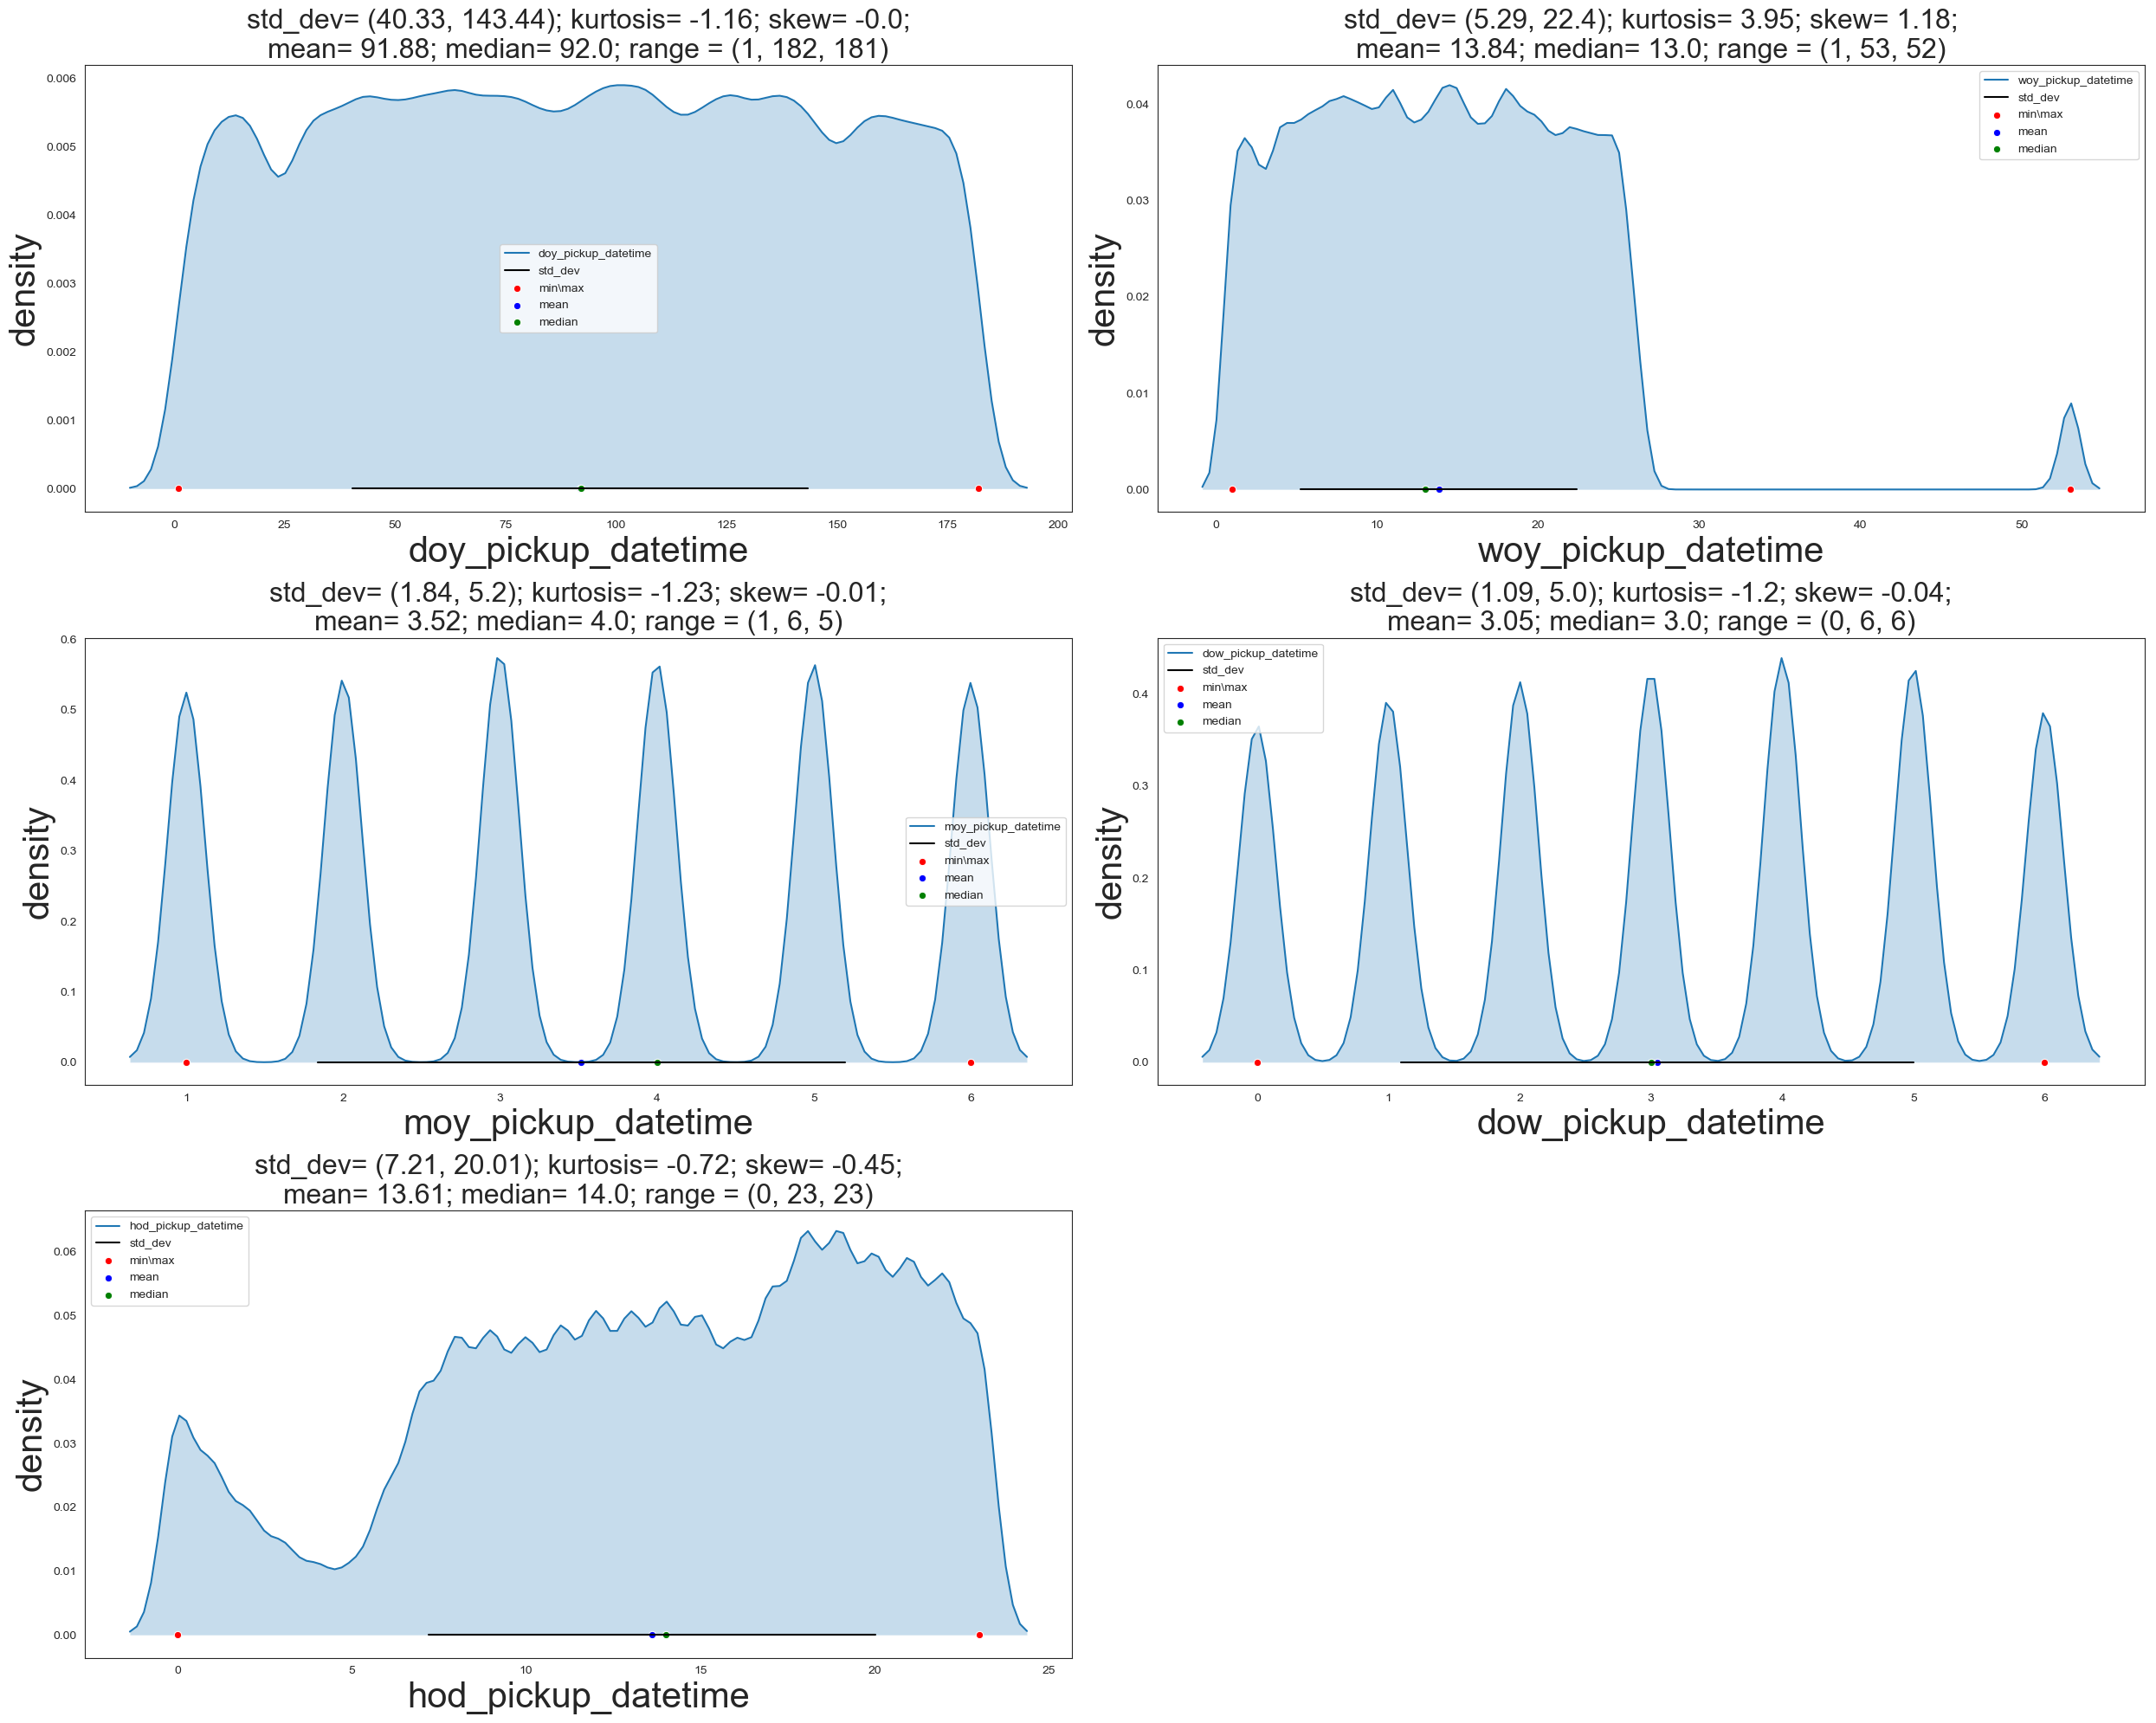

In [19]:
UVA_numerical(data,pickup_datetime)

#### Summery:
* **doy_pickup_datetime**:
    * There are slight daviation in frequency of cab rides each day. 
    * The data is slighly following the uniform distribution.
* **woy_pickup_datetime**:
    * The graph shows some unsual behaviour. As after the week 27, there are no cab rides booked and then it shows some frequency after the 50th week which needed to be anaylsed. 
    * Excluding the right peak. Overall graph shows slight deviation for each week.
* **moy_pickup_datetime**:
    * This plot is normally distributed for each month as skewness is approx. 0.
    * The kurtosis is -ve. Hence, no presence of outliers.
    * This variable should be analysed as categorical variable.
* **dow_pickup_datetime**:
    * This plot is normally distributed for each day as skewness is approx. 0.
    * The kurtosis is -ve. Hence, no presence of outliers 
    * Saturday following with Friday have most freq. for cabs.
    * Monday has least frequency. 
    * This variable should further be analysed as categoriacal.
* **hod_pickup_datetime**:
    * The variable is not very skewed and no presence of outliers detected.
    * From 0 to 6 in the morning, the freq of cabs picked is declining and after 6 till 9 in the morning, it is rising.
    * Peek hours are around 6 to 10 in the evening.
    * Should be converted to sengments as a new variable.

#### Analysing the woy_pickup_datetime further

In [20]:
data['woy_pickup_datetime'].value_counts().sort_index(ascending=False).head()

53     9974
26    14949
25    27084
24    27143
23    27798
Name: woy_pickup_datetime, dtype: int64

* There are 9974 cabs picked in the 53rd week.
* But there are only 52 weeks in a year. 

In [21]:
# Looking at the top pickup dates for the week 53. 
data[['pickup_datetime','woy_pickup_datetime']][data['woy_pickup_datetime'] == 53].sort_values(by='pickup_datetime').head(8)

,pickup_datetime,woy_pickup_datetime
507479,2016-01-01 00:01:14,53
665302,2016-01-01 00:01:20,53
354561,2016-01-01 00:02:06,53
128746,2016-01-01 00:04:42,53
709545,2016-01-01 00:05:07,53
702757,2016-01-01 00:05:08,53
332745,2016-01-01 00:05:39,53
171631,2016-01-01 00:06:12,53


In [22]:
# Looking at the bottom pickup dates for week 53
data[['pickup_datetime','woy_pickup_datetime']][data['woy_pickup_datetime'] == 53].sort_values(by='pickup_datetime').tail(8)

,pickup_datetime,woy_pickup_datetime
446085,2016-01-03 23:53:52,53
166438,2016-01-03 23:54:16,53
339800,2016-01-03 23:55:48,53
356818,2016-01-03 23:56:15,53
226356,2016-01-03 23:57:12,53
569914,2016-01-03 23:58:25,53
183668,2016-01-03 23:58:33,53
708095,2016-01-03 23:59:46,53


* Looking at the head and tail of the tables we can conclude that this week 53 lies between 2016-01-01 to 2016-01-03.
* The problem is with the day of week function which counts from the first monday of the year. And in our dataset it is on 2016-01-04.

In [23]:
# Function to retrive week of year variable
def weekofyear(data, var, var2):
    list = data[var]
    list2 = []
    for i in list:
        new = ceil(i/7)
        list2.append(new)
    data['woy_'+var2] = list2


In [24]:
# Using weekof year function for 'woy_pickup_datetime' variable.
weekofyear(data, 'doy_pickup_datetime','pickup_datetime')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,doy_pickup_datetime,woy_pickup_datetime,moy_pickup_datetime,dow_pickup_datetime,hod_pickup_datetime,doy_dropoff_datetime,woy_dropoff_datetime,moy_dropoff_datetime,dow_dropoff_datetime,hod_dropoff_datetime
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,60,9,2,0,16,60,9,2,0,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,71,11,3,4,23,71,10,3,4,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,52,8,2,6,17,52,7,2,6,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,5,1,1,1,9,5,1,1,1,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,48,7,2,2,6,48,7,2,2,6


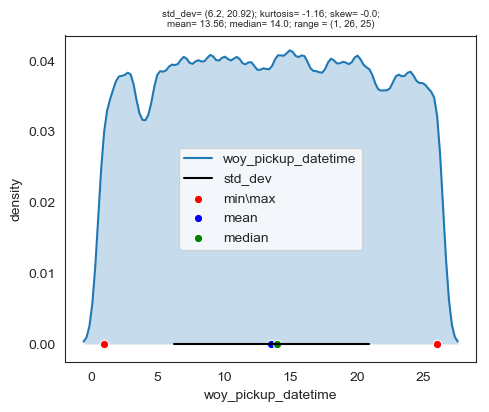

In [25]:
# Checking the plot for 'woy_pichup_datetime'
var = ['woy_pickup_datetime']
UVA_numerical(data,var)

#### Observations:
*    There is a significant drop in freq. of cab taken for week 4.

### dropoff_datetime

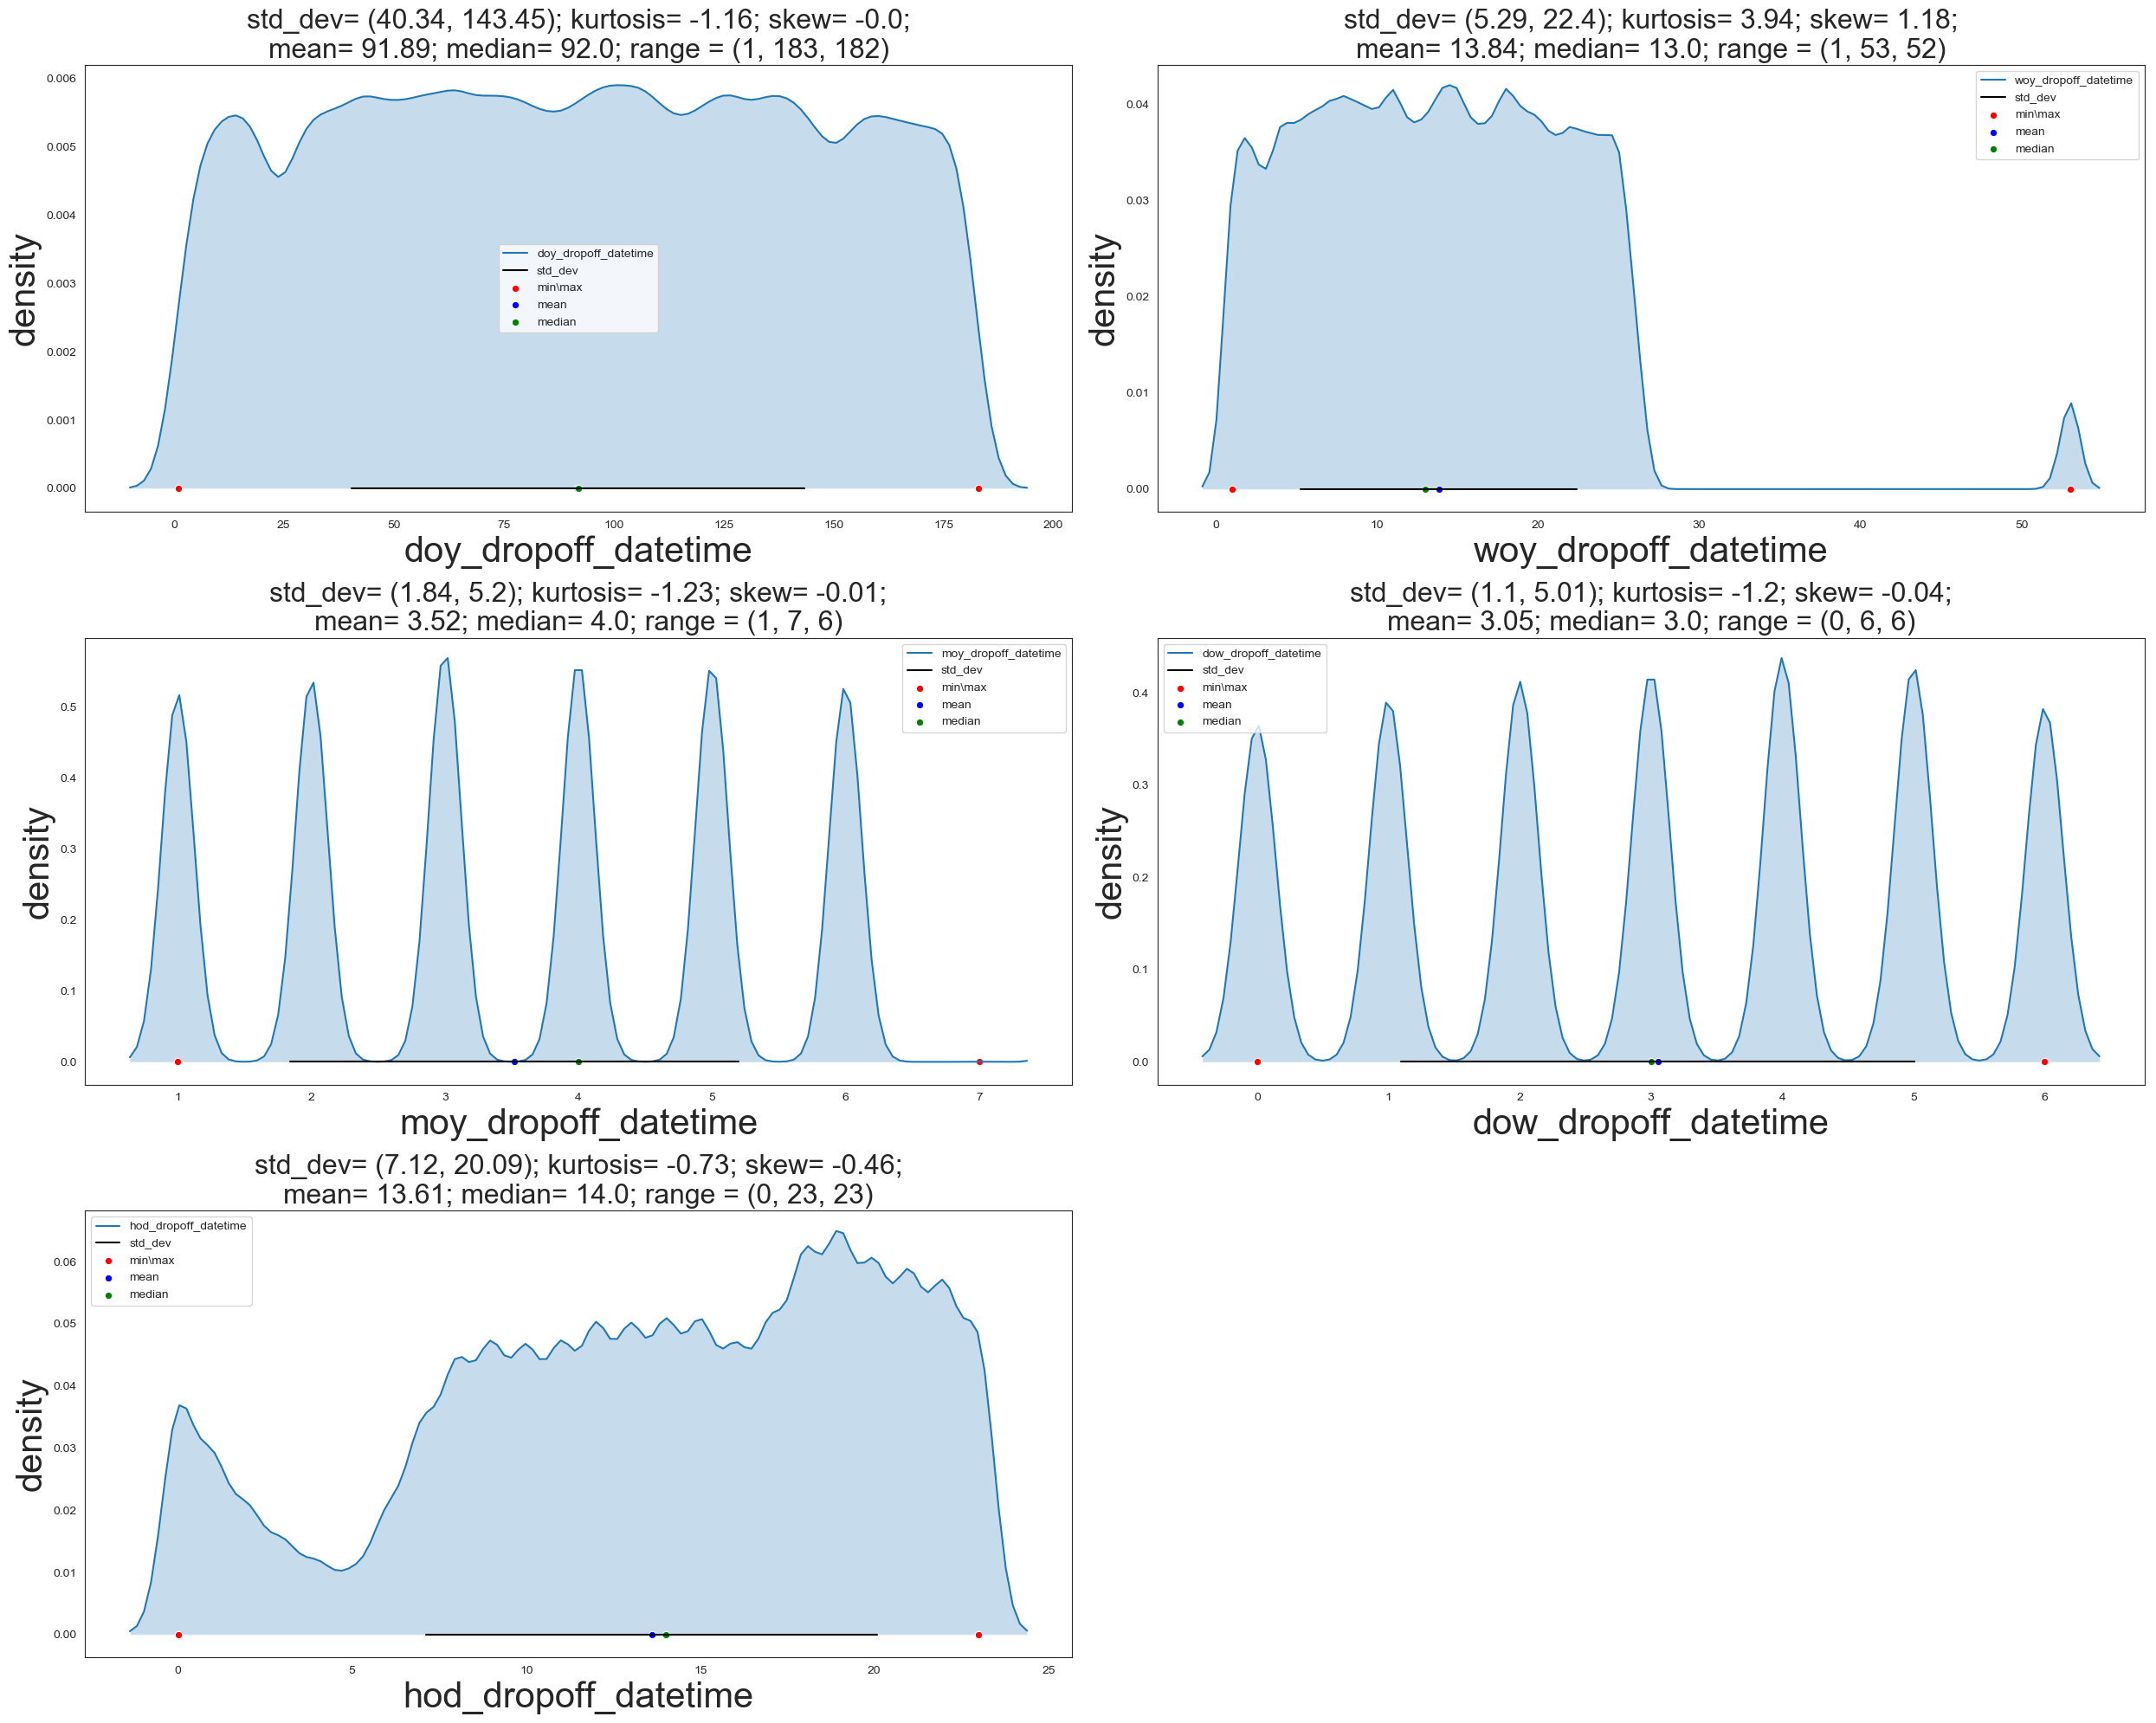

In [26]:
UVA_numerical(data,dropoff_datetime)

#### Observations:
*    All the graphs follow the same trend as pick_datetime variable.
*    Need to remove the anomaly in 'woy_dropoff_datetime'

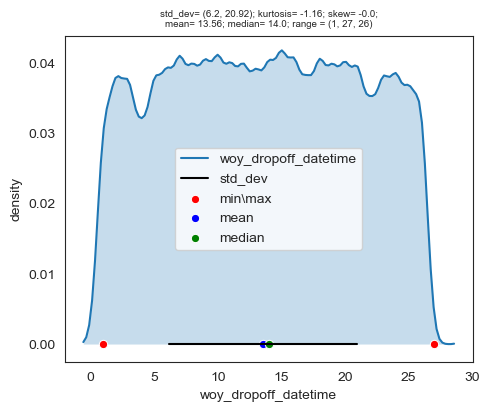

In [27]:
# Re-evaluating and ploting the 'woy_dropoff_datetime' variable.
weekofyear(data,'doy_dropoff_datetime','dropoff_datetime')

var = ['woy_dropoff_datetime']
UVA_numerical(data,var)

In [28]:
# Creating a new variable hod_segments for dropoff and pickup


### trip_duration 

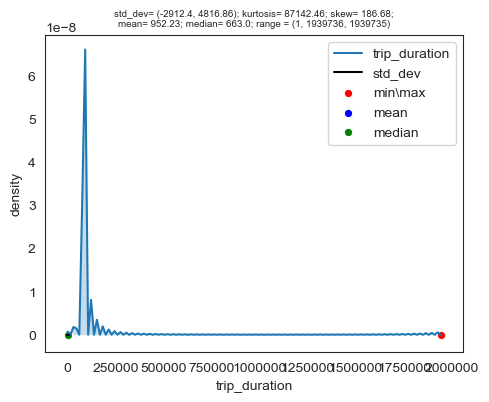

In [29]:

UVA_numerical(data, trip_duration)

#### Observations:
* Skewness value is very high and positve i.e the plot is positivly skewed.
* kurtosis value is very high. Outliers/Extreme values are present.
* Might need to look at the plot without outliers.
* There are few trips which lasted only for few seconds/minutes. Might need to look into it.
* There are few trips that lasted 2000000 seconds. Might need to look into it.

In [30]:
# Checking no. of trip duration less than 1 minute
data[data['trip_duration'] < 60 ]['trip_duration'].count()

4271

In [31]:
# Checking the variables 
data[data['trip_duration'] < 60 ].head(8)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,doy_pickup_datetime,woy_pickup_datetime,moy_pickup_datetime,dow_pickup_datetime,hod_pickup_datetime,doy_dropoff_datetime,woy_dropoff_datetime,moy_dropoff_datetime,dow_dropoff_datetime,hod_dropoff_datetime
136,id1514658,1,2016-03-22 08:23:09,2016-03-22 08:23:16,2,-73.902054,40.764011,-73.902061,40.764023,N,...,82,12,3,1,8,82,12,3,1,8
415,id0446273,2,2016-04-04 12:56:16,2016-04-04 12:56:26,5,-73.863091,40.769840,-73.863312,40.769630,N,...,95,14,4,0,12,95,14,4,0,12
448,id1326538,2,2016-03-18 12:19:33,2016-03-18 12:19:42,1,-73.974197,40.762718,-73.975693,40.760723,N,...,78,12,3,4,12,78,12,3,4,12
785,id1764292,1,2016-03-15 15:13:22,2016-03-15 15:14:16,1,-73.985260,40.763458,-73.982109,40.767265,N,...,75,11,3,1,15,75,11,3,1,15
1493,id1359484,1,2016-04-28 09:59:34,2016-04-28 10:00:32,1,-73.996864,40.737514,-73.998665,40.738136,N,...,119,17,4,3,9,119,17,4,3,10
1875,id2240426,1,2016-05-27 10:00:44,2016-05-27 10:01:24,1,-73.982811,40.735378,-73.985085,40.732166,N,...,148,22,5,4,10,148,22,5,4,10
2118,id1308991,1,2016-01-20 17:35:14,2016-01-20 17:36:04,1,-73.782440,40.646725,-73.783096,40.648872,N,...,20,3,1,2,17,20,3,1,2,17
2272,id2120960,2,2016-03-27 11:15:29,2016-03-27 11:16:01,1,-74.015747,40.708672,-74.015610,40.709270,N,...,87,13,3,6,11,87,13,3,6,11


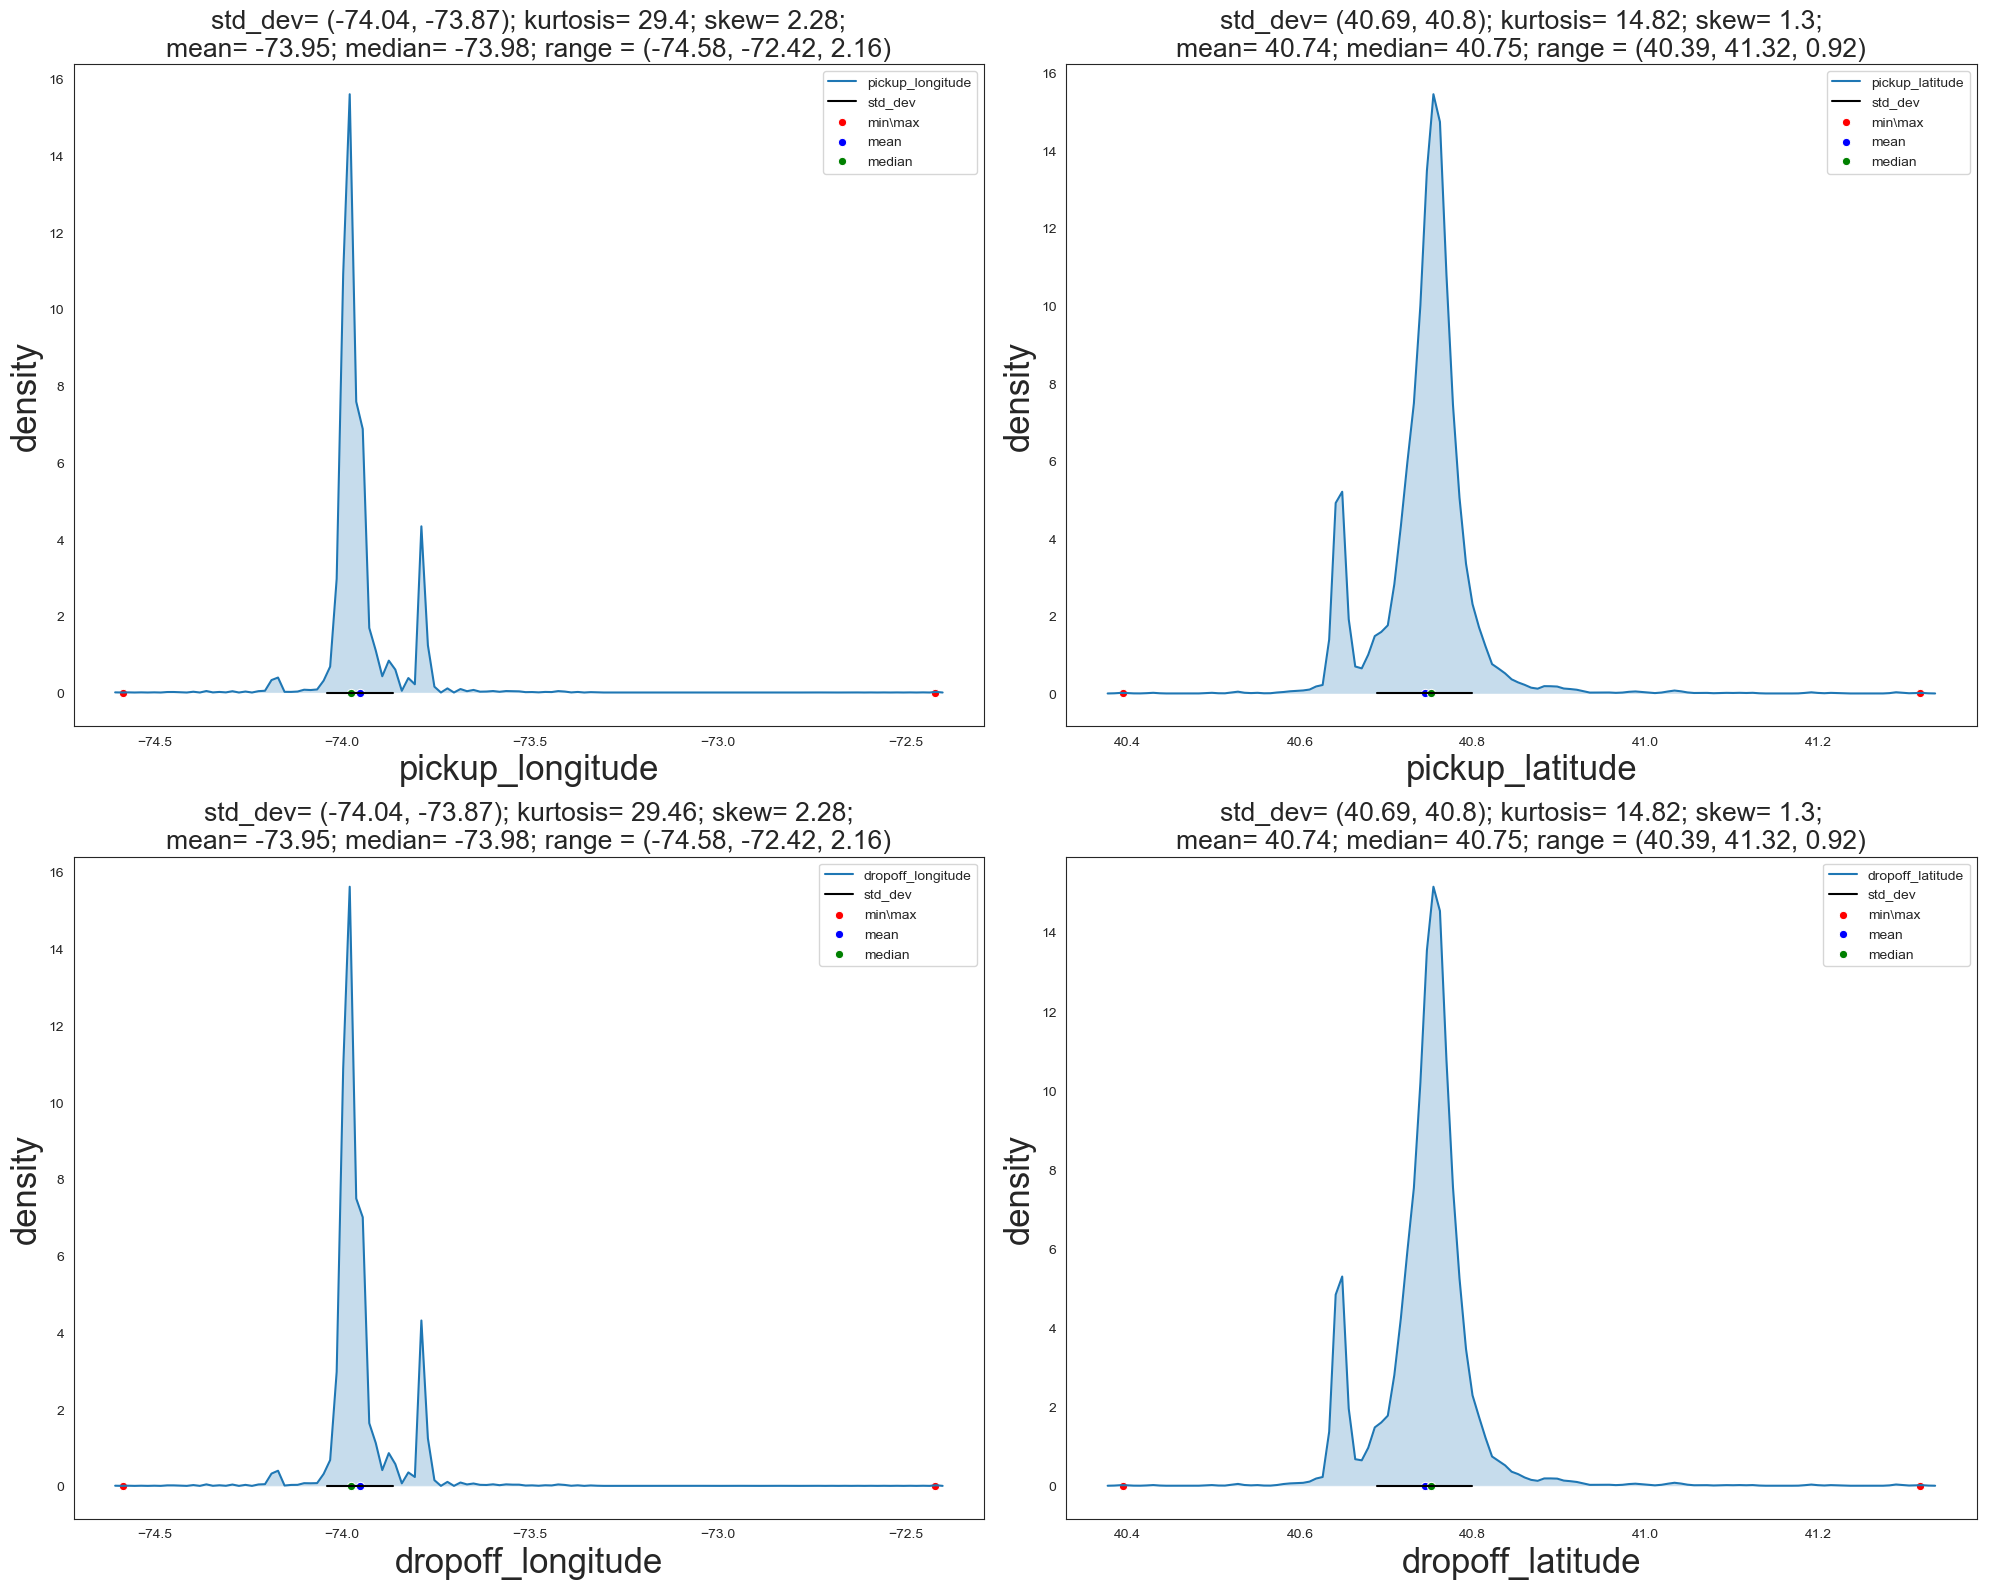

In [32]:
# Checking distribution of geographics for time_duration less than 1 minute. 
new = data[data['trip_duration'] < 60 ]
UVA_numerical(new, geographic_info)

### Observation:
* The longitude and latitude for pickup and dropoff follows the exact trend. The data seems valid.

In [33]:
# Checking the top 10 longest duration rides.
data.sort_values(by='trip_duration', ascending=False).reset_index()['trip_duration'].head(10)

0    1939736
1      86391
2      86387
3      86378
4      86377
5      86369
6      86369
7      86367
8      86365
9      86364
Name: trip_duration, dtype: int64

#### Observations:
* Only 1 cab ride is 1939736 seconds or 22.5 days long. Might need to look into it.

In [34]:
# Checking the data 
data[data['trip_duration'] == 1939736]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,doy_pickup_datetime,woy_pickup_datetime,moy_pickup_datetime,dow_pickup_datetime,hod_pickup_datetime,doy_dropoff_datetime,woy_dropoff_datetime,moy_dropoff_datetime,dow_dropoff_datetime,hod_dropoff_datetime
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,...,5,1,1,1,0,27,4,1,2,11


#### Observations:
* Looking at the day of year pickup and day of year dropoff, the value seems valid.
* This value is too extreme and could affect our analysis further, we should drop this row.

In [35]:
# droping the row 
data.drop(labels=data.index[21813],axis=0,inplace=True)

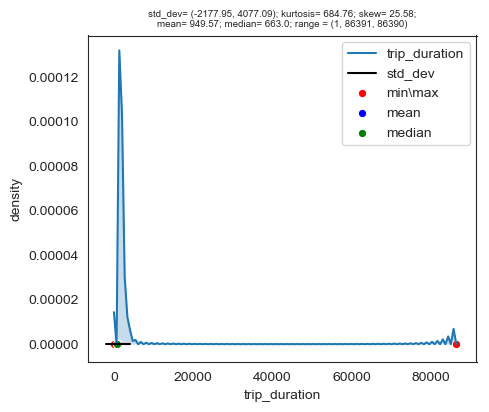

In [36]:
# Checking the trip_duration variable after eliminating the extreme outlier
UVA_numerical(data,trip_duration)

#### Observation:
* The disribution is still positively skewed and outliers are present. Might need to look without outliers.

In [37]:
# standerd daviation factor 
factor = 3

# copying trip_duration to new dataframe for further analysis 
td_data = data[trip_duration]

# filtering the data using standerd daviation (not including data after 1 standerd daviations away from mean)
td_data = td_data[td_data['trip_duration'] < factor*td_data['trip_duration'].std() ]

# checking how many values has been removed 
len(data), len(td_data)

(729321, 728283)

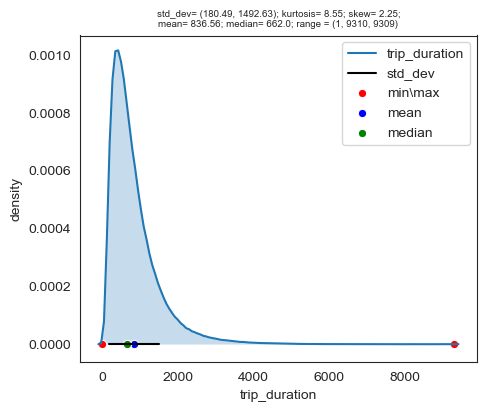

In [38]:
UVA_numerical(td_data,trip_duration)

### Observations:
* Most of the trip duration lies between 500 to 2000 seconds window.

## Univeriate Analysis: Categorical Variables 

In [39]:
# Converting hour of the day to 4 segments daytime.
import datetime
def timezone(x):
    if x>=datetime.time(5, 0, 1) and x <=datetime.time(11, 0, 0):
        return 'morning'
    elif x>=datetime.time(11, 0, 1) and x <=datetime.time(17, 0, 0):
        return 'midday'
    elif x>=datetime.time(17, 0, 1) and x <=datetime.time(23, 0, 0):
        return 'evening'
    elif x>=datetime.time(23, 0, 1) or x <=datetime.time(5, 0, 0):
        return 'late night'
    
data['daytime_pickup']=data['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
data['daytime_dropoff']=data['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

In [40]:
# Converting trip_duration to hour wise segments
def trip_segments(x):
    if x <= 18000:
        return 'less than 5 hours'
    elif x > 18000 and x <= 36000:
        return '5-10 hours'
    elif x > 36000 and x <= 54000:
        return '10-15 hours'
    elif x > 54000 and x <= 72000:
        return '15-20 hours'
    else:
        return 'more than 20 hours'

data['trip_duration_seg'] = data['trip_duration'].apply(lambda x: trip_segments(x))

In [41]:
# Coverting moy and doy to categorical vairables
data['moy_pickup_datetime'] = data['moy_pickup_datetime'].astype('category')
data['dow_pickup_datetime'] = data['dow_pickup_datetime'].astype('category')
data['moy_dropoff_datetime'] = data['moy_dropoff_datetime'].astype('category')
data['dow_dropoff_datetime'] = data['dow_dropoff_datetime'].astype('category')
data['daytime_dropoff'] = data['daytime_pickup'].astype('category')
data['daytime_pickup'] = data['daytime_pickup'].astype('category')
data['trip_duration_seg'] = data['trip_duration_seg'].astype('category')

In [42]:
data.select_dtypes(include=['object','category']).dtypes

id                        object
vendor_id               category
passenger_count         category
store_and_fwd_flag      category
moy_pickup_datetime     category
dow_pickup_datetime     category
moy_dropoff_datetime    category
dow_dropoff_datetime    category
daytime_pickup          category
daytime_dropoff         category
trip_duration_seg       category
dtype: object

* **id** is just a unique identifier for each trip. So we can drop it from our analysis.
* **vendor_id, passenger_count and store_and_fwd_flag** can be analysed as a group.
* daytime variables can be analysed as a group.
* The rest variables are datetime and can be analysed as a group.

In [43]:
# Custom function for visualisation of categorical variables 
def UVA_category(data, var_group):
    
    # setting figure dimensions
    size = len(var_group)
    plt.figure(figsize=(7*size,5), dpi=100)

    # loop to traverse each variable 
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize=True)
        n_unique   = data[i].nunique()
        
        
        # Ploting the variables 
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count, norm_count.index, order= norm_count.index)
        plt.xlabel('fraction/percent', fontsize=20)
        plt.ylabel('{}'.format(i), fontsize=20)
        plt.title('n_unique = {};\nvalue_counts = {}'.format(n_unique,norm_count))
    

#### General Categories

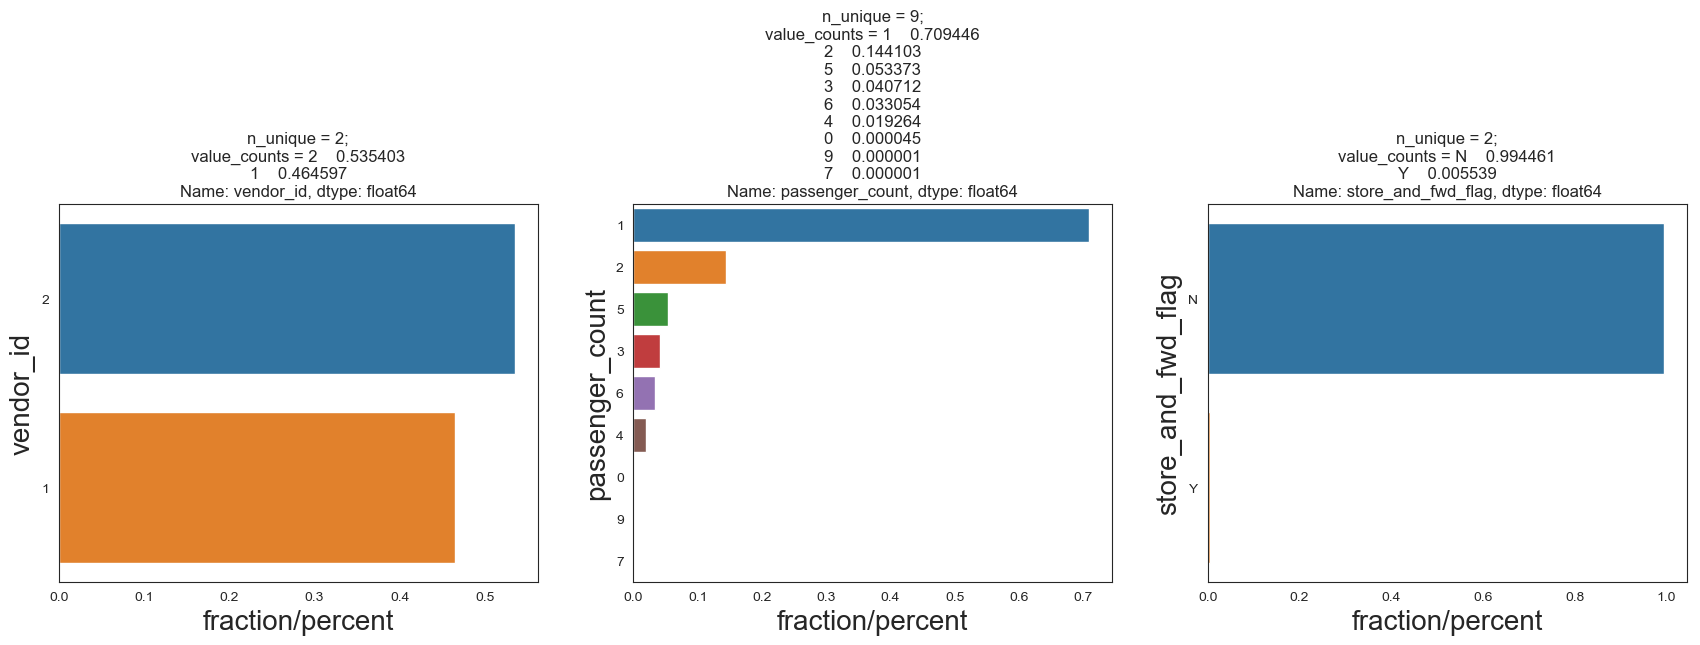

In [44]:
var = ['vendor_id','passenger_count','store_and_fwd_flag']
UVA_category(data,var)

#### Observations:
* **vendor_id**:
    * People have taken cabs of vender_id 2 than vender_id 1.
* **passenger_count**:
    * 70% of people have have travelled solo in cab.
    * Some trips have been made with no passengers. Might need to look into it.
    * Some trips have 9 passangers counts.
* **store_and_fwd_flag**:
    * Approximatly 99.5% times the store_and_fwd_flag is N.


In [45]:
data = data.drop(columns=['id','pickup_datetime','dropoff_datetime'])

#### datetime variables

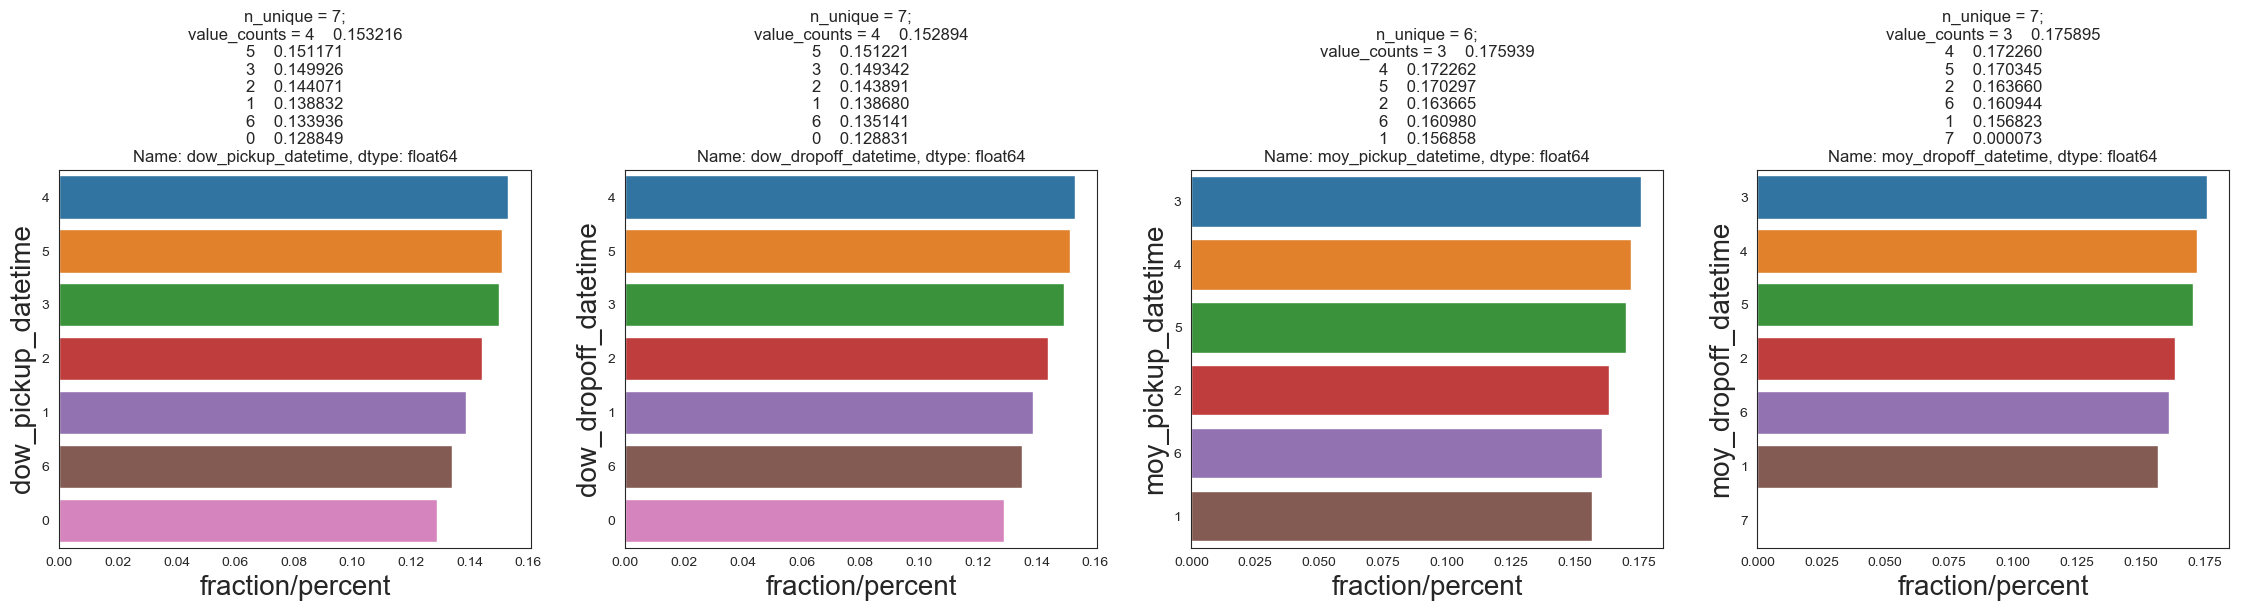

In [46]:
# week of month and month of year variables for pickup and dropoff 
UVA_category(data,['dow_pickup_datetime', 'dow_dropoff_datetime', 'moy_pickup_datetime', 'moy_dropoff_datetime'])

#### Observations:
* Frequency of cabs picked and dropped is highest on friday and lowest is on monday.
* Frequancy of cabs picked and dropped is highest in march and lowest in january.

#### daytime variables

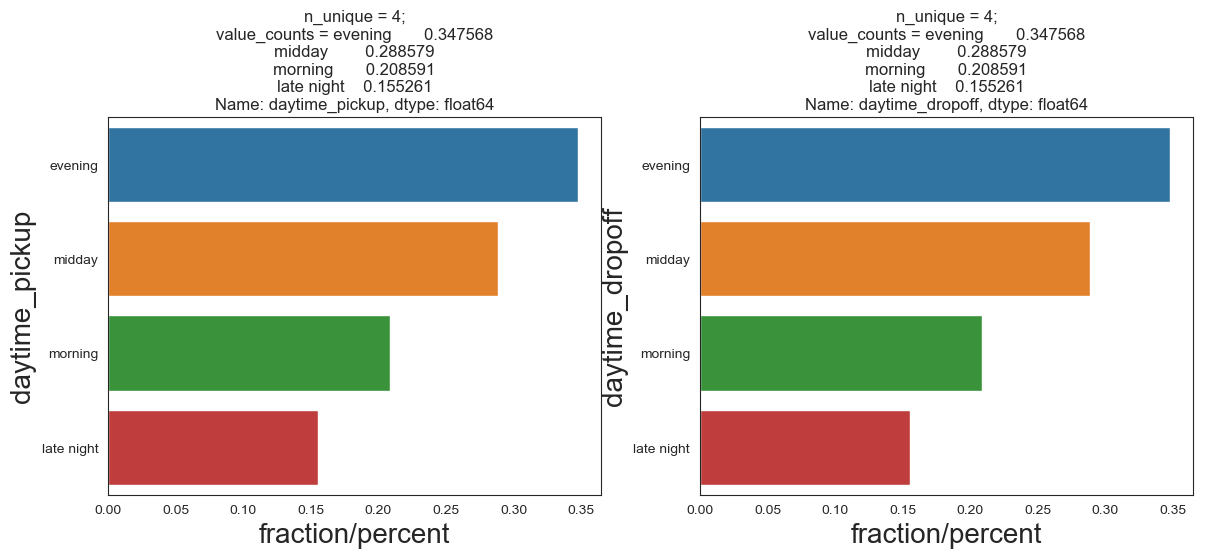

In [47]:
UVA_category(data,['daytime_pickup','daytime_dropoff'])

#### Observations:
* frequency of cabs picked and dropped is highest at evenning time and lowest at night time.

#### trip_duration segments

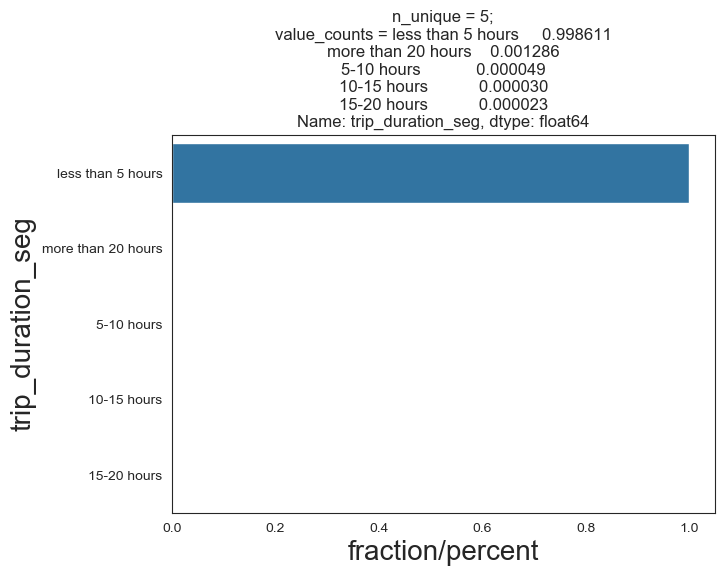

In [48]:
UVA_category(data, ['trip_duration_seg'])

#### Observations:
* 99.86% of cabs riden have trip duration less than 5 hours.


## Univariate Analysis: Missing Value 

In [49]:
# finding the number of missing values in our dataset
data.isnull().sum()

vendor_id               0
passenger_count         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
store_and_fwd_flag      0
trip_duration           0
doy_pickup_datetime     0
woy_pickup_datetime     0
moy_pickup_datetime     0
dow_pickup_datetime     0
hod_pickup_datetime     0
doy_dropoff_datetime    0
woy_dropoff_datetime    0
moy_dropoff_datetime    0
dow_dropoff_datetime    0
hod_dropoff_datetime    0
daytime_pickup          0
daytime_dropoff         0
trip_duration_seg       0
dtype: int64

* There are no missing values in the data.

## Univeriate Analysis: Outliers

* We suspected outliers in geopraphical variables. We can verify those using boxplots.

In [50]:
# Function to detect and visualize outliers 
def UVA_outliers(data, var_group, include_outlier=True):
    
    # Laying out dimensions of our figure
    size = len(var_group)
    plt.figure(figsize=(5*size,3 if size == 1 else 7*ceil(size/2)),dpi=100)
    
    # Loop to iterate each variable 
    for j,i in enumerate(var_group):
        
        # descriptive statistics required for outlier analysis 
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        med     = data[i].median()
        IQR     = quant75 - quant25
        whisk_high = quant75 + (1.5*IQR)
        whisk_low  = quant25 - (1.5*IQR)
        
        # count of outliers present 
        out_high = len(data[i][data[i]>whisk_high])
        out_low  = len(data[i][data[i]<whisk_low])
        
        # Boxplot with outliers 
        if include_outlier == True:
            
            # Ploting the variables 
            plt.subplot(ceil(size/2),1 if size==1 else 2, j+1)
            sns.boxplot(data[i], orient='v')
            plt.ylabel('{}'.format(i),fontsize= (size*4+5))
            plt.tight_layout()
            plt.title("With Outliers \nIQR = {}; Median = {}; \n 2nd,3rd Quartile = {}; \n Outlier(low/high) = {}".format(round(IQR,2),
                                                                                                                         round(med,2),
                                                                                                                         (round(quant25,2),round(quant75,2)),
                                                                                                                         (out_low,out_high)),fontsize=(size*3+5))
        else:
             #Ploting the variable
            data_out = data[var_group][:]
            data_out[i][data_out[i] > whisk_high] = whisk_high +1
            data_out[i][data_out[i] < whisk_low]  = whisk_low - 1
            
            plt.subplot(ceil(size/2),1 if size==1 else 2, j+1)
            sns.boxplot(data_out[i], orient='v')
            plt.ylabel('{}'.format(i),fontsize= (size*4 + 5))
            plt.tight_layout()
            plt.title("Without Outliers \nIQR = {}; Median = {}; \n 2nd,3rd Quartile = {}; \n Outlier(low/high) = {}".format(round(IQR,2),
                                                                                                                         round(med,2),
                                                                                                                         (round(quant25,2),round(quant75,2)),
                                                                                                                         (out_low,out_high)),fontsize=(size*3 +5))
                      
       

### geographic_info 

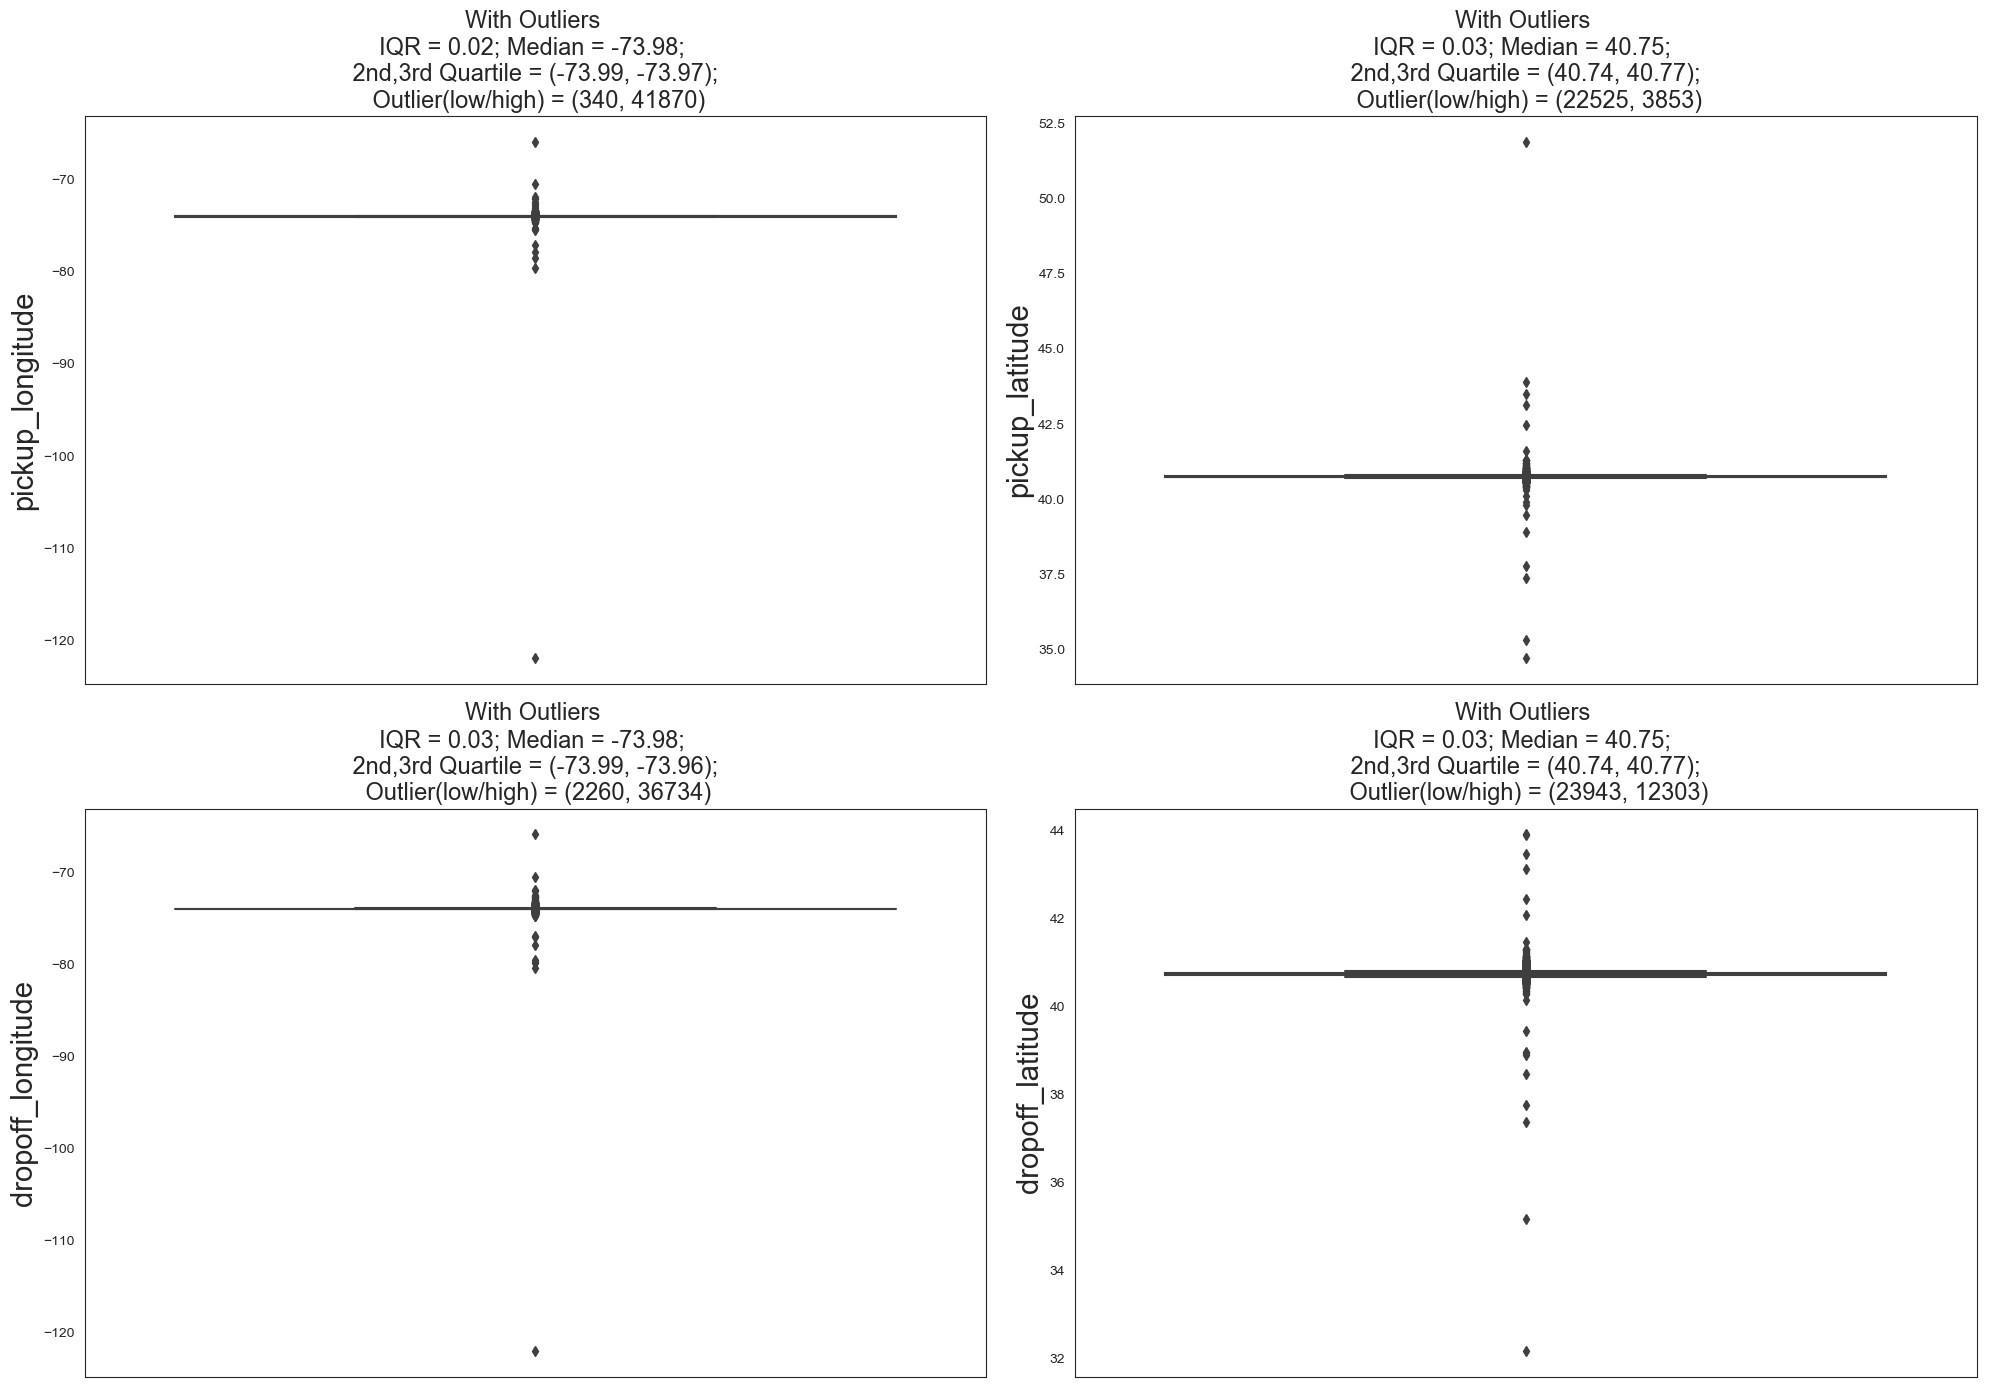

In [51]:
# Boxplot with oultiers 
UVA_outliers(data,geographic_info,)

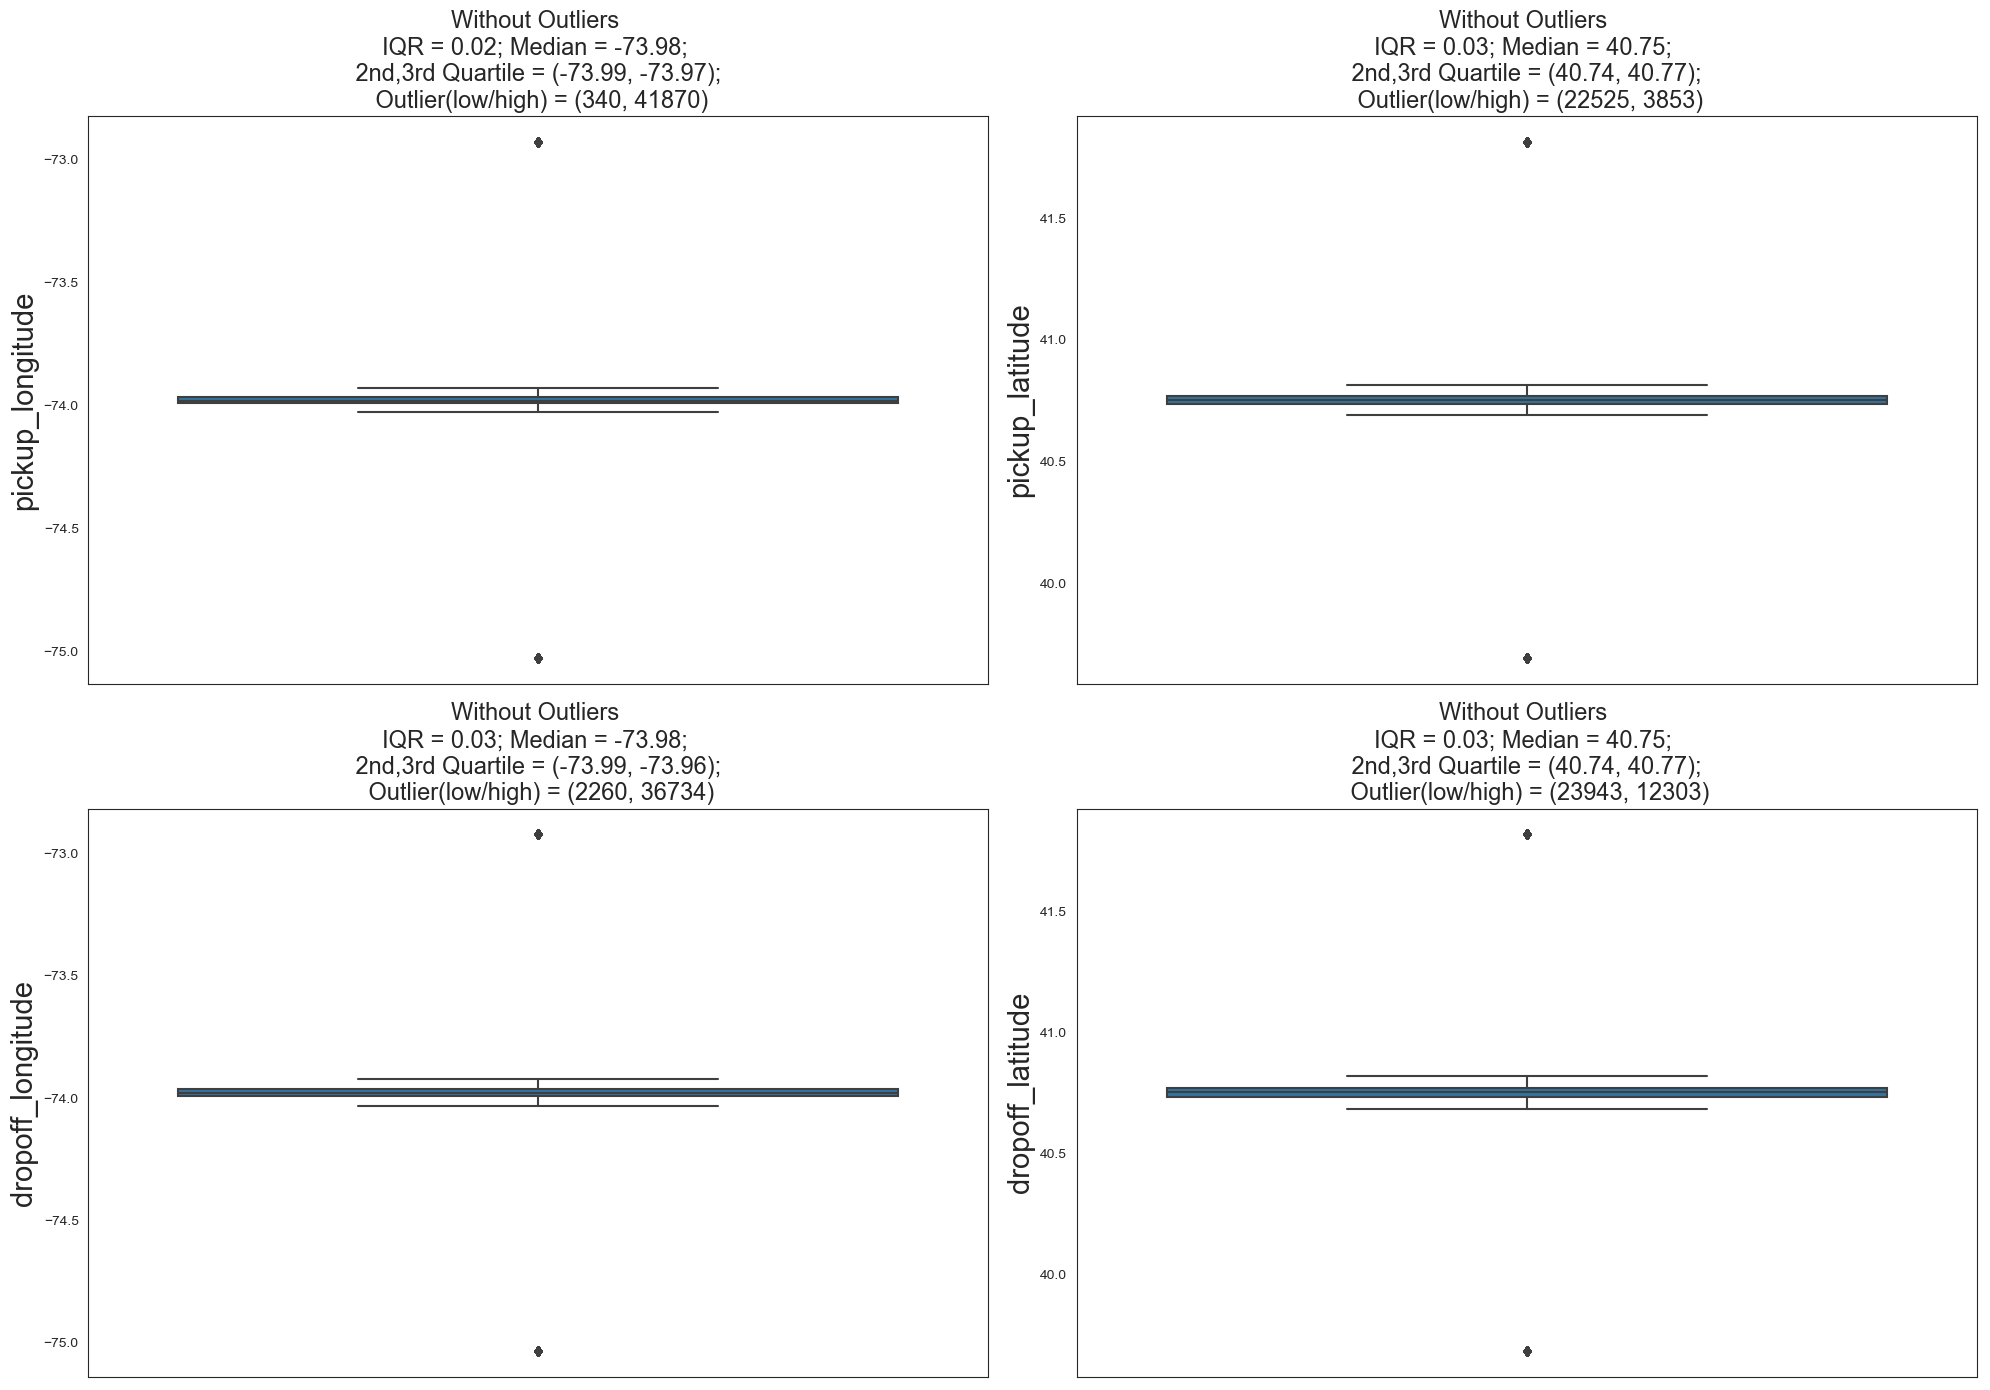

In [52]:
# Boxplot without outliers 
UVA_outliers(data,geographic_info, include_outlier=False)

#### Observations:
* Both pickup and dropoff follows the simmilar distribution.
* For both longitutde and latitude significant amount of outliers present in pickup and dropoff.
* After eliminating the outliers, we can see most of the data points are very close to each other. 

### pickup_datetime

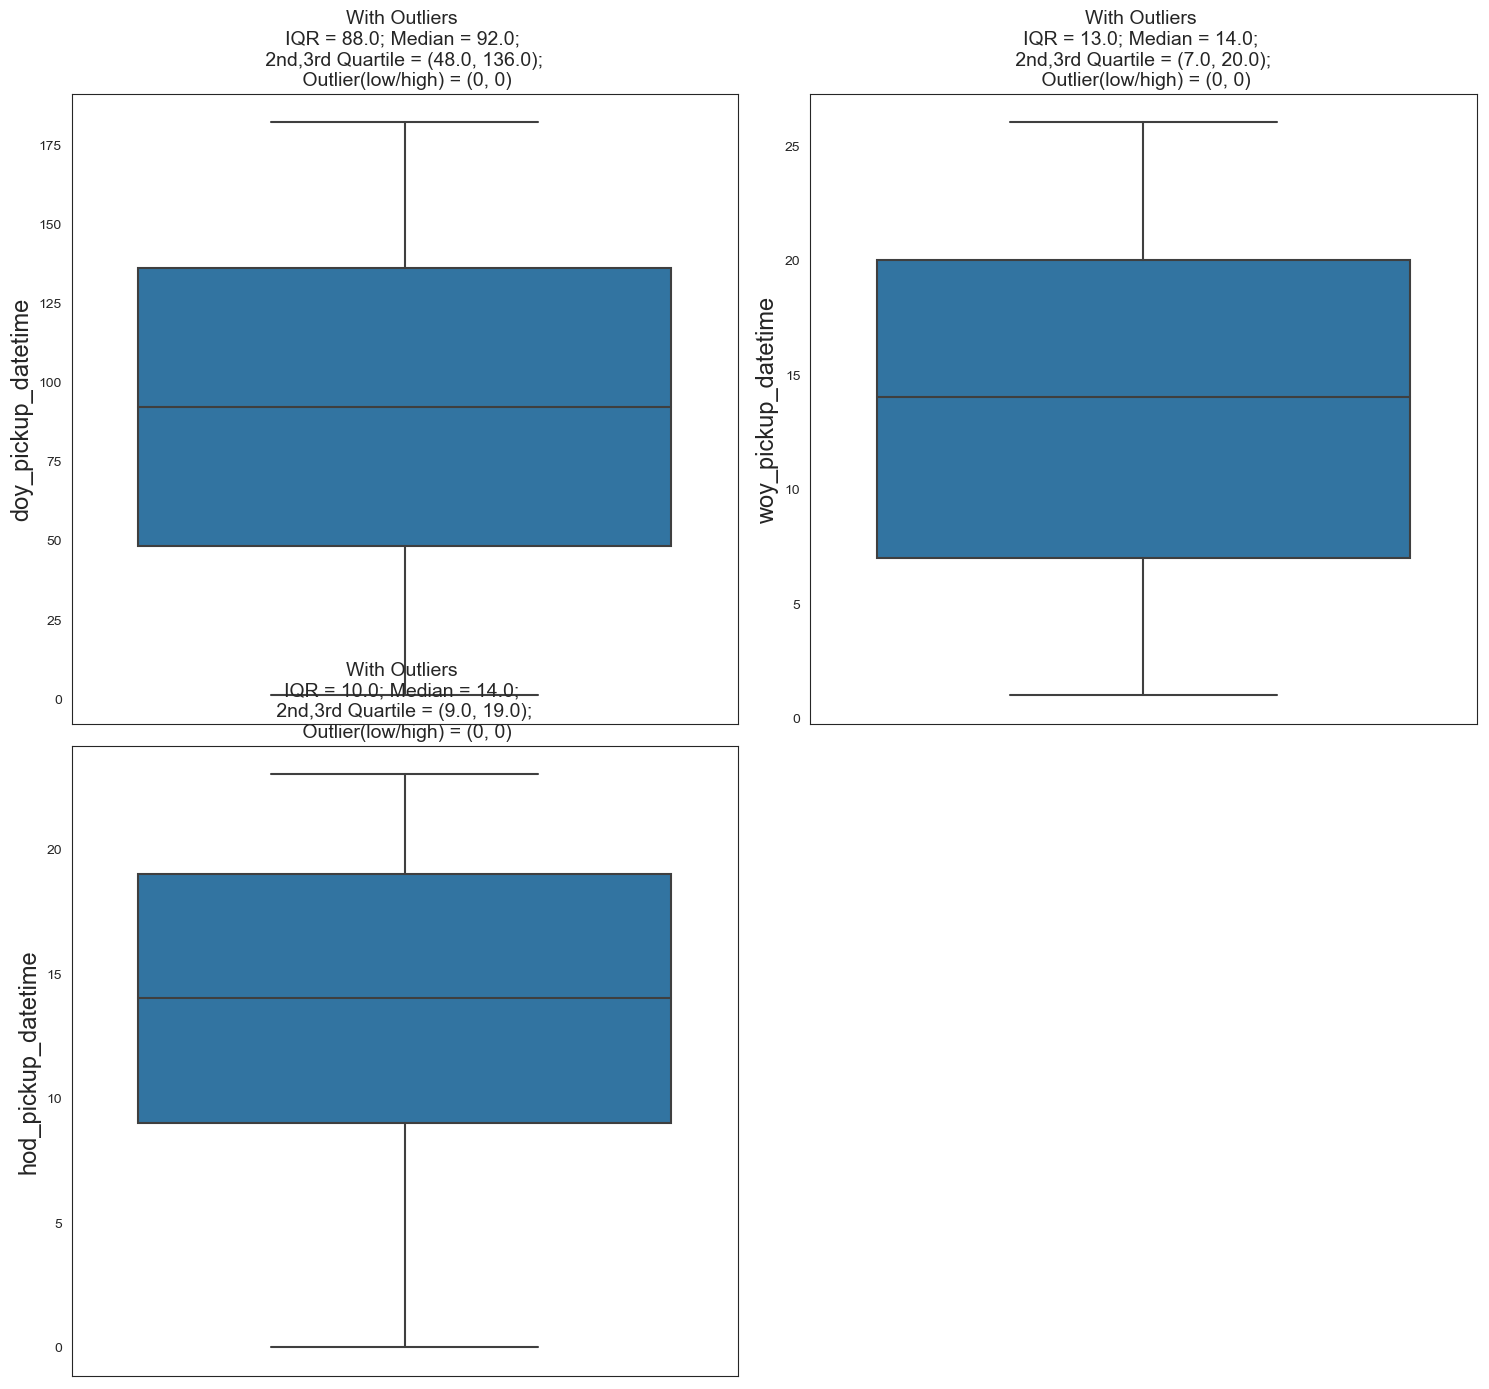

In [53]:
# boxplot with outliers 
pickup_datetime = ['doy_pickup_datetime','woy_pickup_datetime', 'hod_pickup_datetime']
UVA_outliers(data, pickup_datetime,)

#### Observations:
* Values are evenly distributed.
* No outliers are present.

### dropoff_datetime

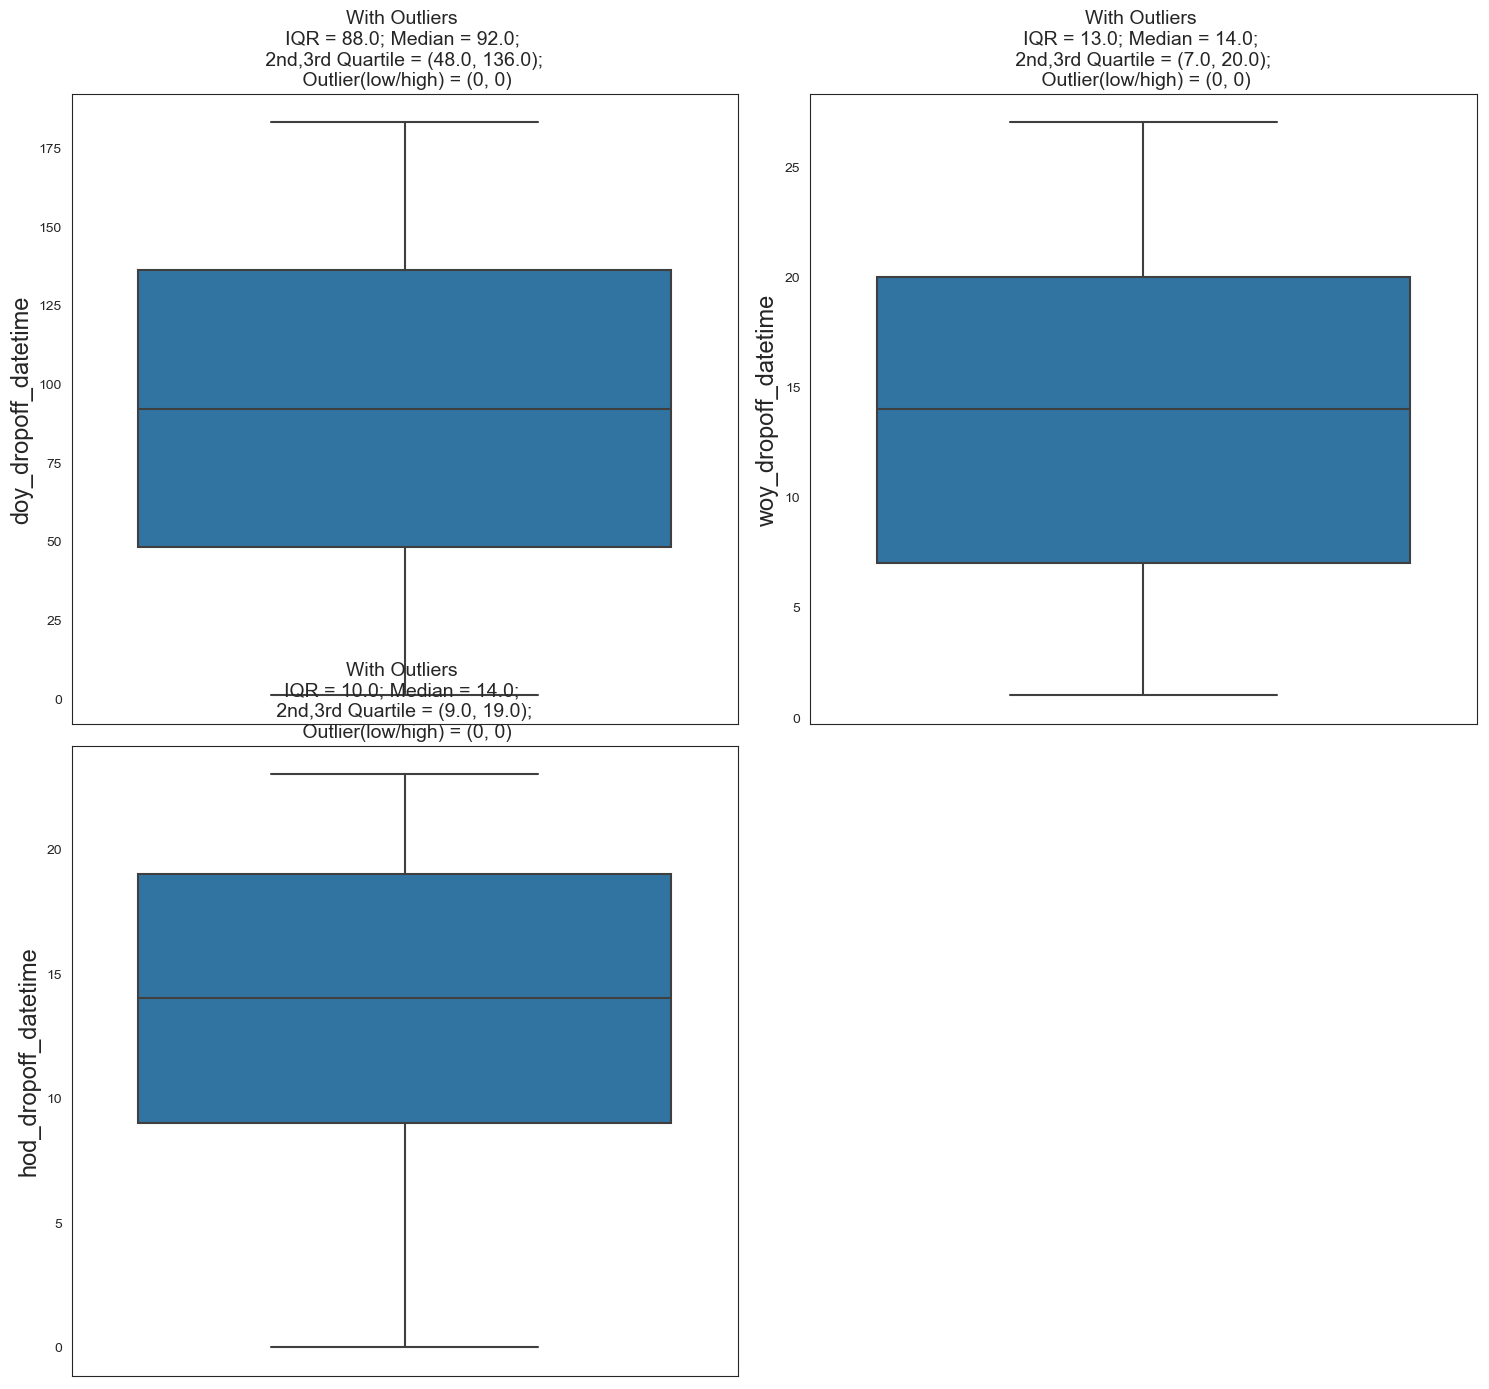

In [54]:
# boxplot wiht outliers 
dropoff_datetime = ['doy_dropoff_datetime','woy_dropoff_datetime','hod_dropoff_datetime']
UVA_outliers(data, dropoff_datetime, )

#### Observations:
* Values are evenly distributed.
* No outliers are present.

### trip_duration 

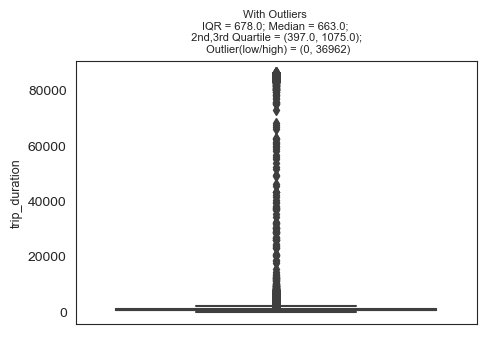

In [55]:
# Boxplot with outliers 
UVA_outliers(data,trip_duration,)

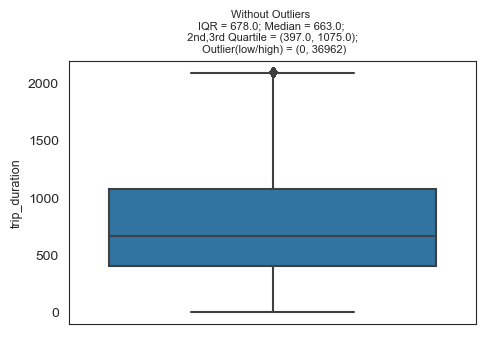

In [56]:
# Boxplot without outliers
UVA_outliers(data,trip_duration,False)

#### Observations:
* Significant amount of outliers present outside the higher whisker.
* Without outliers data is evenly distributed.

## Bivariate Analysis: Numerical-Numerical 

In [57]:
# Isotating numerical variables
num_data = data.select_dtypes(include= ['int64','float64'])[:]
num_data.dtypes

pickup_longitude        float64
pickup_latitude         float64
dropoff_longitude       float64
dropoff_latitude        float64
trip_duration             int64
doy_pickup_datetime       int64
woy_pickup_datetime       int64
hod_pickup_datetime       int64
doy_dropoff_datetime      int64
woy_dropoff_datetime      int64
hod_dropoff_datetime      int64
dtype: object

### Corelation Matrix 

In [58]:
# calculating using coorr function 
correlation = num_data.corr()
correlation

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_pickup_datetime,woy_pickup_datetime,hod_pickup_datetime,doy_dropoff_datetime,woy_dropoff_datetime,hod_dropoff_datetime
pickup_longitude,1.000000,0.047648,0.780649,0.118472,0.041561,0.003743,0.003376,0.010762,0.003769,0.003395,0.011172
pickup_latitude,0.047648,1.000000,0.119972,0.479358,-0.044442,-0.001252,-0.002103,0.011424,-0.001318,-0.002180,0.018059
dropoff_longitude,0.780649,0.119972,1.000000,0.149598,0.025331,0.003762,0.003680,-0.022014,0.003787,0.003712,-0.023193
dropoff_latitude,0.118472,0.479358,0.149598,1.000000,-0.035451,-0.001626,-0.002237,0.014259,-0.001671,-0.002301,0.018173
trip_duration,0.041561,-0.044442,0.025331,-0.035451,1.000000,0.013070,0.012867,0.005488,0.013779,0.013601,0.004082
doy_pickup_datetime,0.003743,-0.001252,0.003762,-0.001626,0.013070,1.000000,0.999213,-0.003554,0.999998,0.999211,-0.004271
woy_pickup_datetime,0.003376,-0.002103,0.003680,-0.002237,0.012867,0.999213,1.000000,-0.005719,0.999212,0.999982,-0.006601
hod_pickup_datetime,0.010762,0.011424,-0.022014,0.014259,0.005488,-0.003554,-0.005719,1.000000,-0.003275,-0.005362,0.934592
doy_dropoff_datetime,0.003769,-0.001318,0.003787,-0.001671,0.013779,0.999998,0.999212,-0.003275,1.000000,0.999215,-0.004676
woy_dropoff_datetime,0.003395,-0.002180,0.003712,-0.002301,0.013601,0.999211,0.999982,-0.005362,0.999215,1.000000,-0.007107


#### Summery:
* From the first intution we can say that most variable have very small correlation with each other. 
* Location variables have high correaltion within its location variables.
* Some datetime variables have high correlation within its datetime variables.
* Our target variable trip_duration have very low correlation with all continuous dependent variables. 

### Heatmap

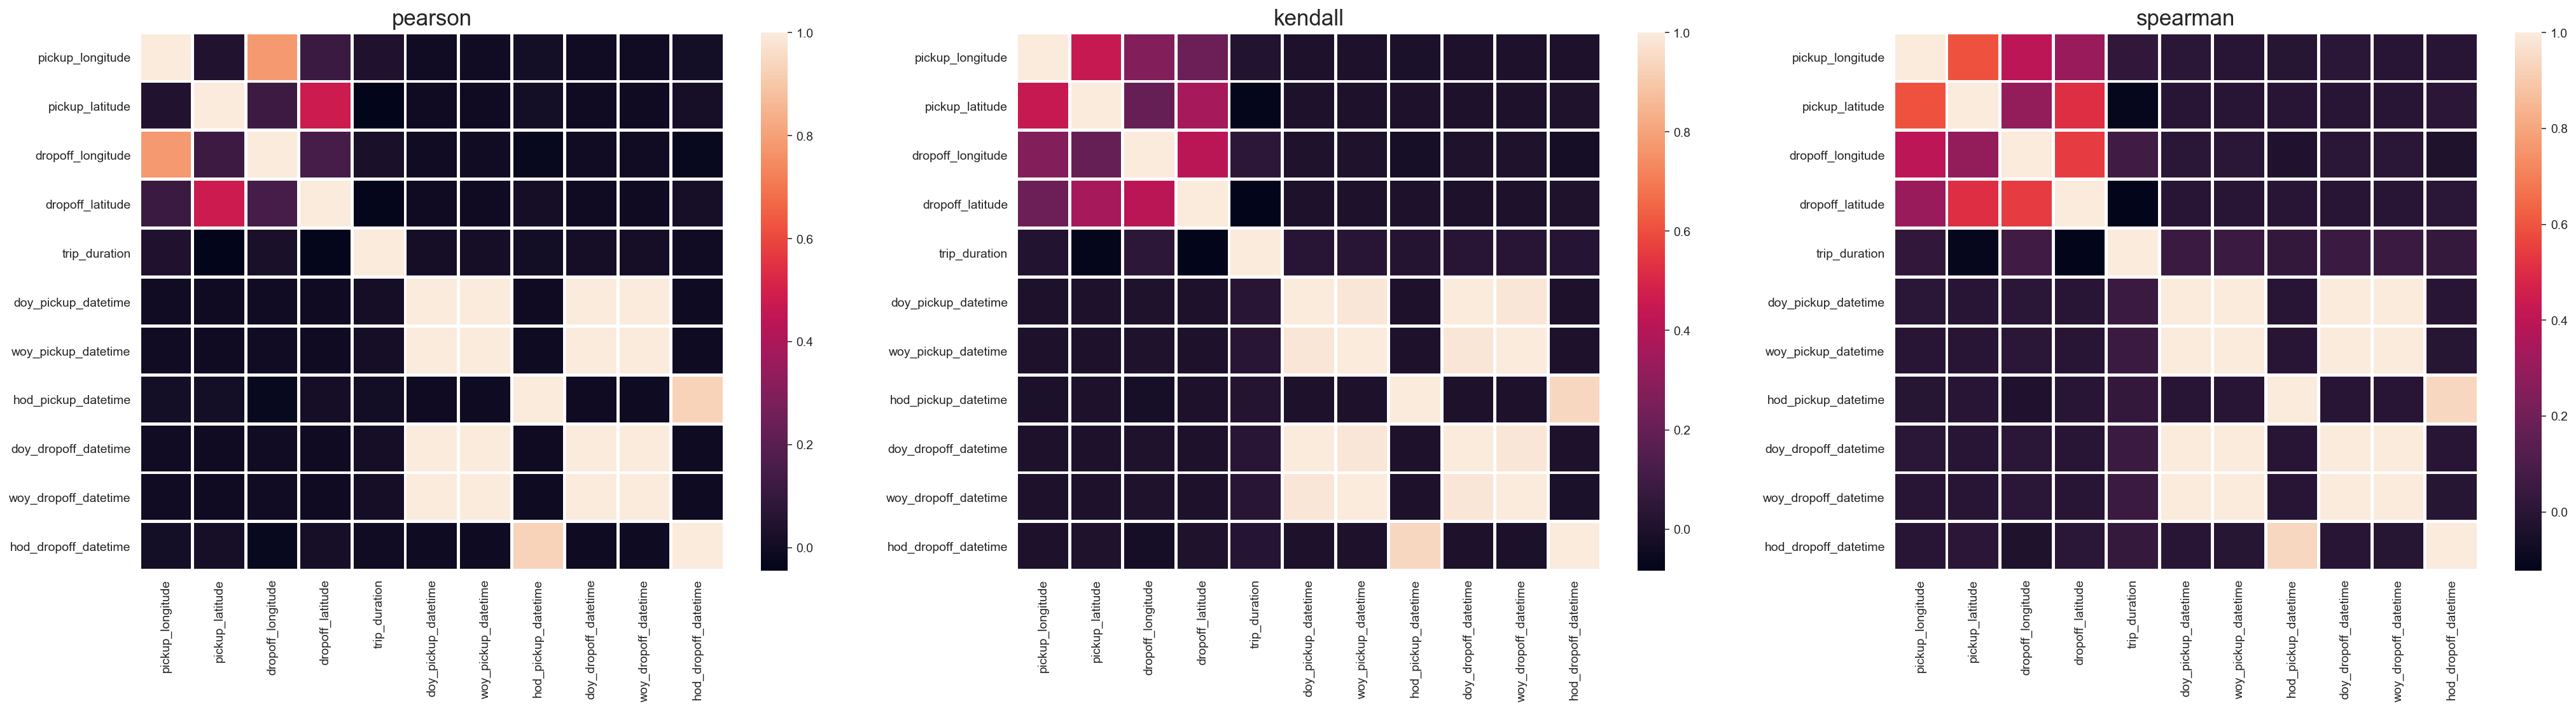

In [59]:
# ploting heatmap for all methords for numerical variables 
plt.figure(figsize=(36,8), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation = num_data.corr(method=i)
    sns.heatmap(correlation, linewidths=2)
    plt.title(i, fontsize=18)

#### Take aways:
* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
* day of year and week of year variable is highly correlated for both pickup and dropoff.
* hour of day of pickup and dropoff is highly correlated. From kde plot and this correlation we can say these two variables are following same treands. This confirms that most cab durations are not very long.
* geographic variables also shows moderate to high correlation.
* correlation between geographic variables have different magnitude for different methods. 

### Scatterplot

In [60]:
# Grouping variables
datetime_var = ['doy_pickup_datetime', 'woy_pickup_datetime', 'hod_pickup_datetime',
                'doy_dropoff_datetime', 'woy_dropoff_datetime', 'hod_dropoff_datetime']

<Figure size 600x400 with 0 Axes>

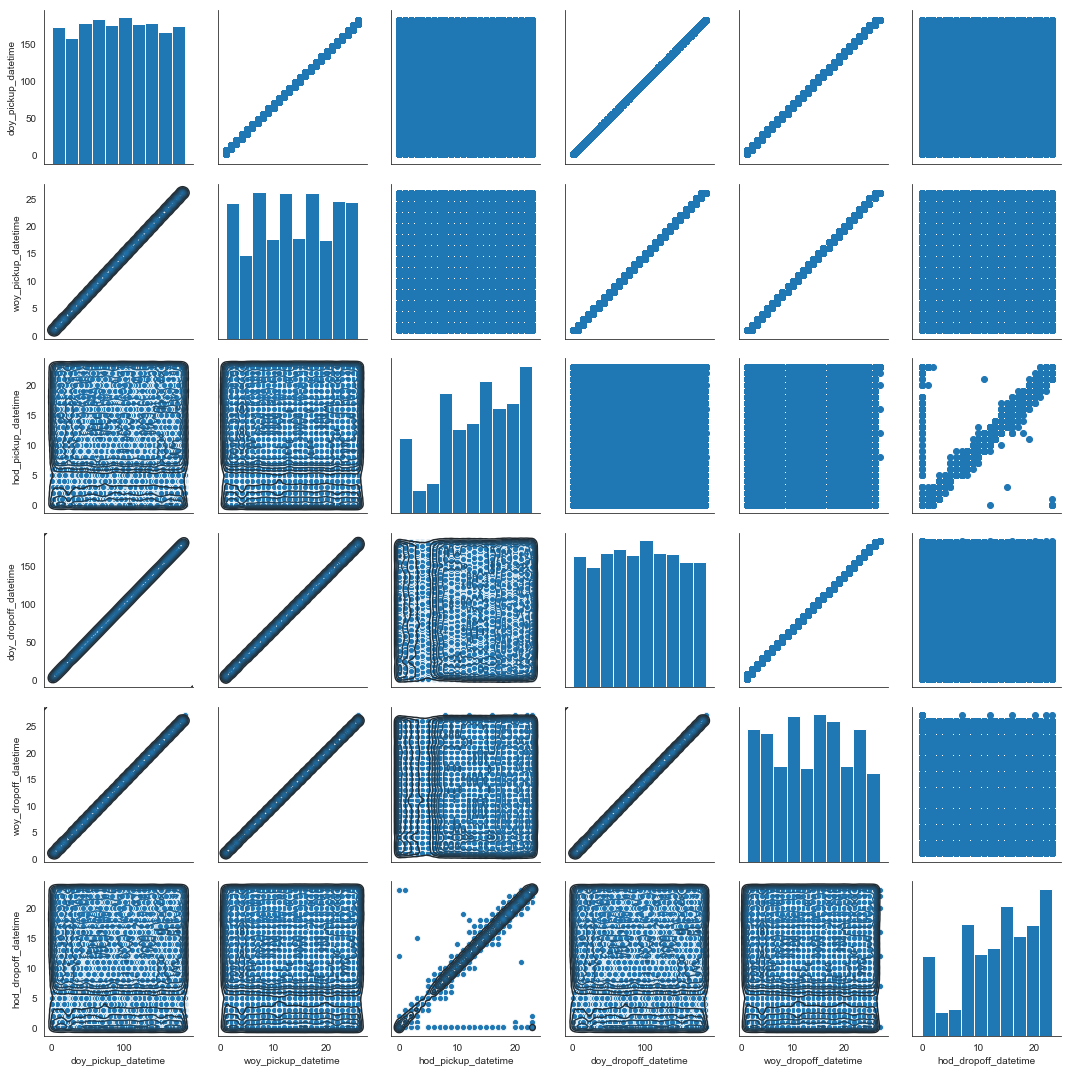

In [61]:
# pairplot for datetime variables
plt.figure(dpi=100)
plot = sns.pairplot(num_data[datetime_var])
plot.map_diag(plt.hist)
plot.map_upper(plt.scatter)
plot.map_lower(sns.kdeplot)

#### Take aways:
* week of year and day of year variable is following the same trend and capturing the similar information. Its better to drop one variable.
* hour of day variables also have high correlation for pickup and dropoff.
* We can clearly see the complete random distribution within hour of day and week of year variables or day of year variables.

In [62]:
num_data = data.select_dtypes(include=['int64','float64'])[:]
num_data.dtypes

pickup_longitude        float64
pickup_latitude         float64
dropoff_longitude       float64
dropoff_latitude        float64
trip_duration             int64
doy_pickup_datetime       int64
woy_pickup_datetime       int64
hod_pickup_datetime       int64
doy_dropoff_datetime      int64
woy_dropoff_datetime      int64
hod_dropoff_datetime      int64
dtype: object

<Figure size 600x400 with 0 Axes>

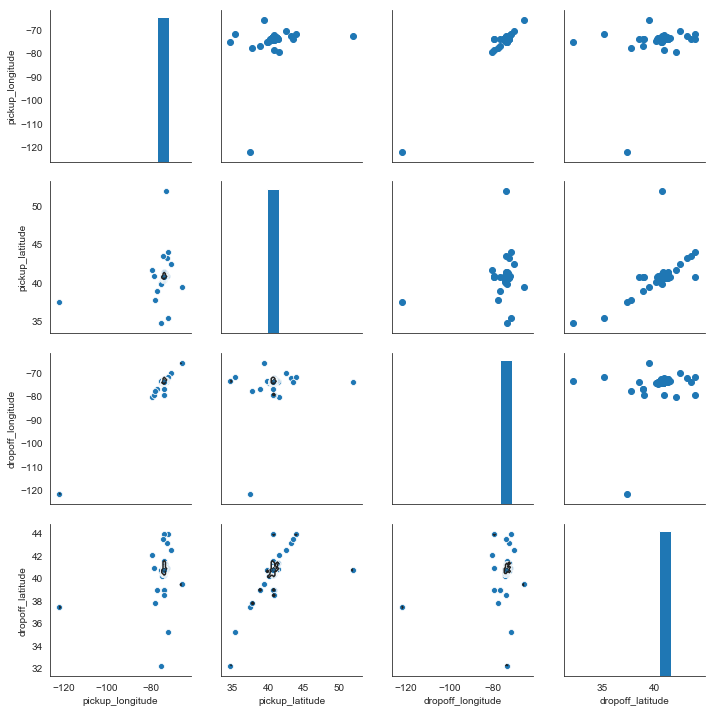

In [63]:
# pairplot for geographic variables
plt.figure(dpi=100)
plot = sns.pairplot(num_data[geographic_info])
plot.map_diag(plt.hist)
plot.map_upper(plt.scatter)
plot.map_lower(sns.kdeplot)

#### Take aways:
* Most of the data is aggregated at one point all the graphs.
* There is randomness between the variables.
* dropoff_latitude and pickup_latitude have a slight linear relationship.

## Bivariate Analysis: Continuous-Categorical

In [66]:
# function to operate 2-sample z test
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    ovr_sigma = sqrt((sigma1**2/N1)+(sigma2**2/N2))
    z = (X1-X2)/ovr_sigma
    pval = 2*(1- norm.cdf(abs(z)))
    return pval

In [67]:
# function to preform 2-sample t-test
def TwoSampT(x1, x2, sd1, sd2, n1, n2):
    
    from numpy import sqrt, abs, round
    from scipy.stats import t as t_dst
    over_sd = sqrt(((sd1**2/n1) + (sd2**2/n2)))
    t = (x1-x2)/over_sd
    df = n1+n2-2
    pval = 2*(1-t_dst.cdf(abs(t),df))
    return pval

In [68]:
def BVA_cont_cat(data, cont, cat, category):
    
    # creating 2 samples
    x1 = data[cont][data[cat]==category][:]
    x2 = data[cont][~(data[cat]==category)][:]
    
    # calculating descriptive statistics 
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.std()
    
    # calculating p-values
    t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
    z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)
    
    # table
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc= np.mean)
    
    # plotting
    plt.figure(figsize = (15,6), dpi=140)
    
    # barplot 
    plt.subplot(1,2,1)
    sns.barplot([str(category), 'not {}'.format(category)], [m1,m2])
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(cat)
    plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
    
    #boxplot
    plt.subplot(1,2,2)
    sns.stripplot(x=cat, y=cont, data=data)
    plt.title('stripplot plot')
                      

### Is there any difference in avg. trip duration for different vendors?

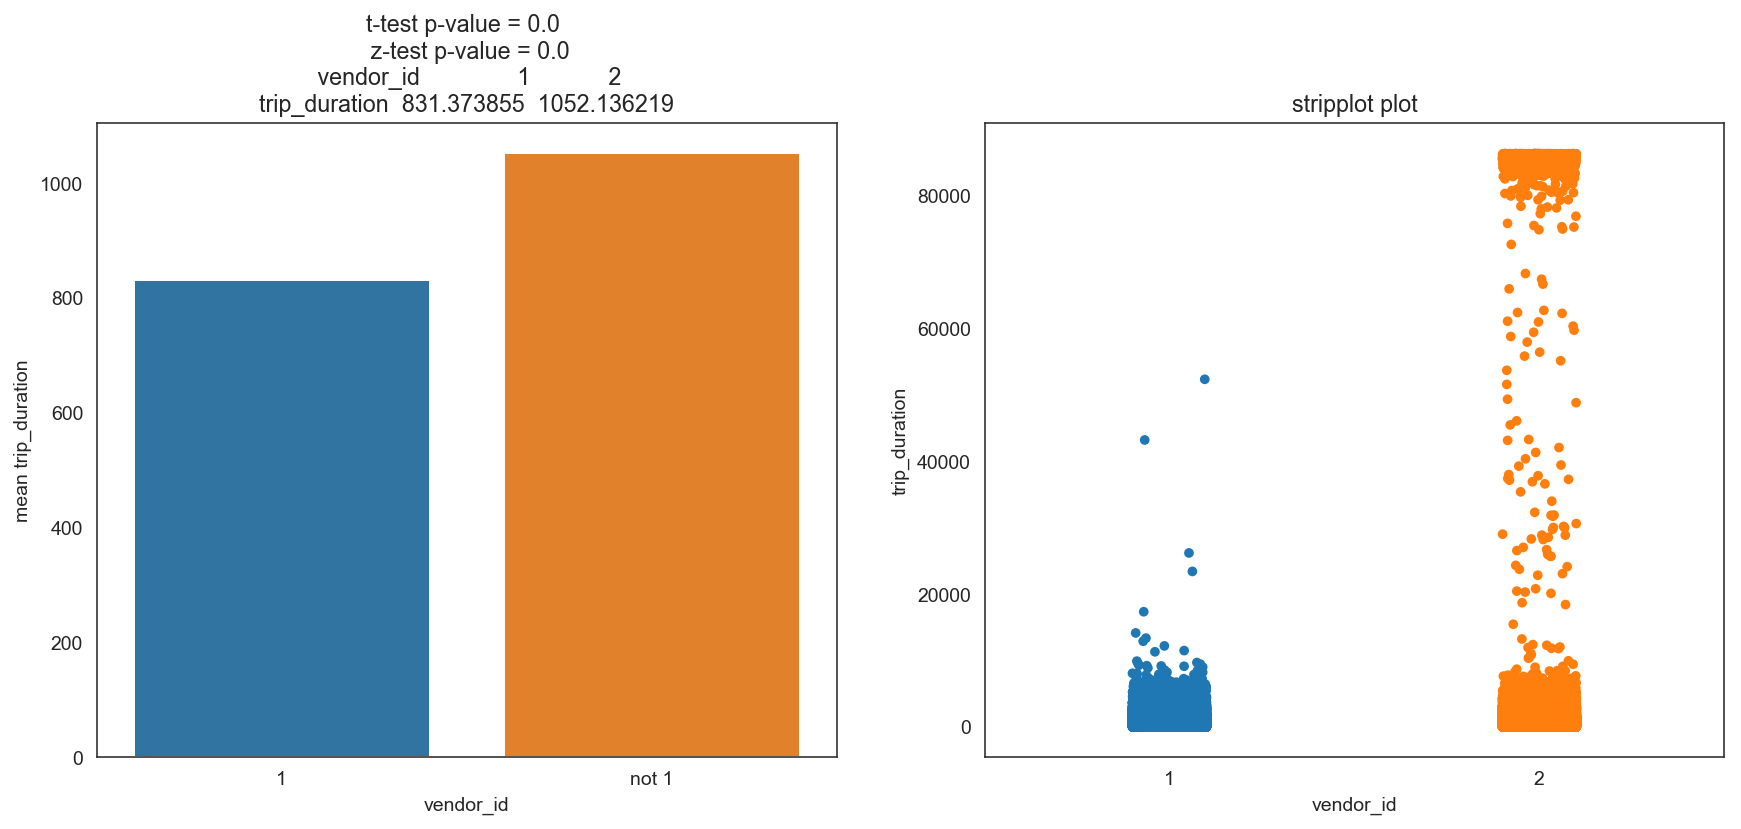

In [69]:
BVA_cont_cat(data,'trip_duration','vendor_id',1)

#### Result:
* The difference between vonder_id for avg. trip duration in significant enough.
* vendor_id 2 have 220 seconds more avg. trip duration than vendor_id 1. 
* For extended travels people tend to prefer vendor_id 2 over vendor_id 1. 

### Is there any difference between different store_and_fwd_flag  categories for avg. trip duration?

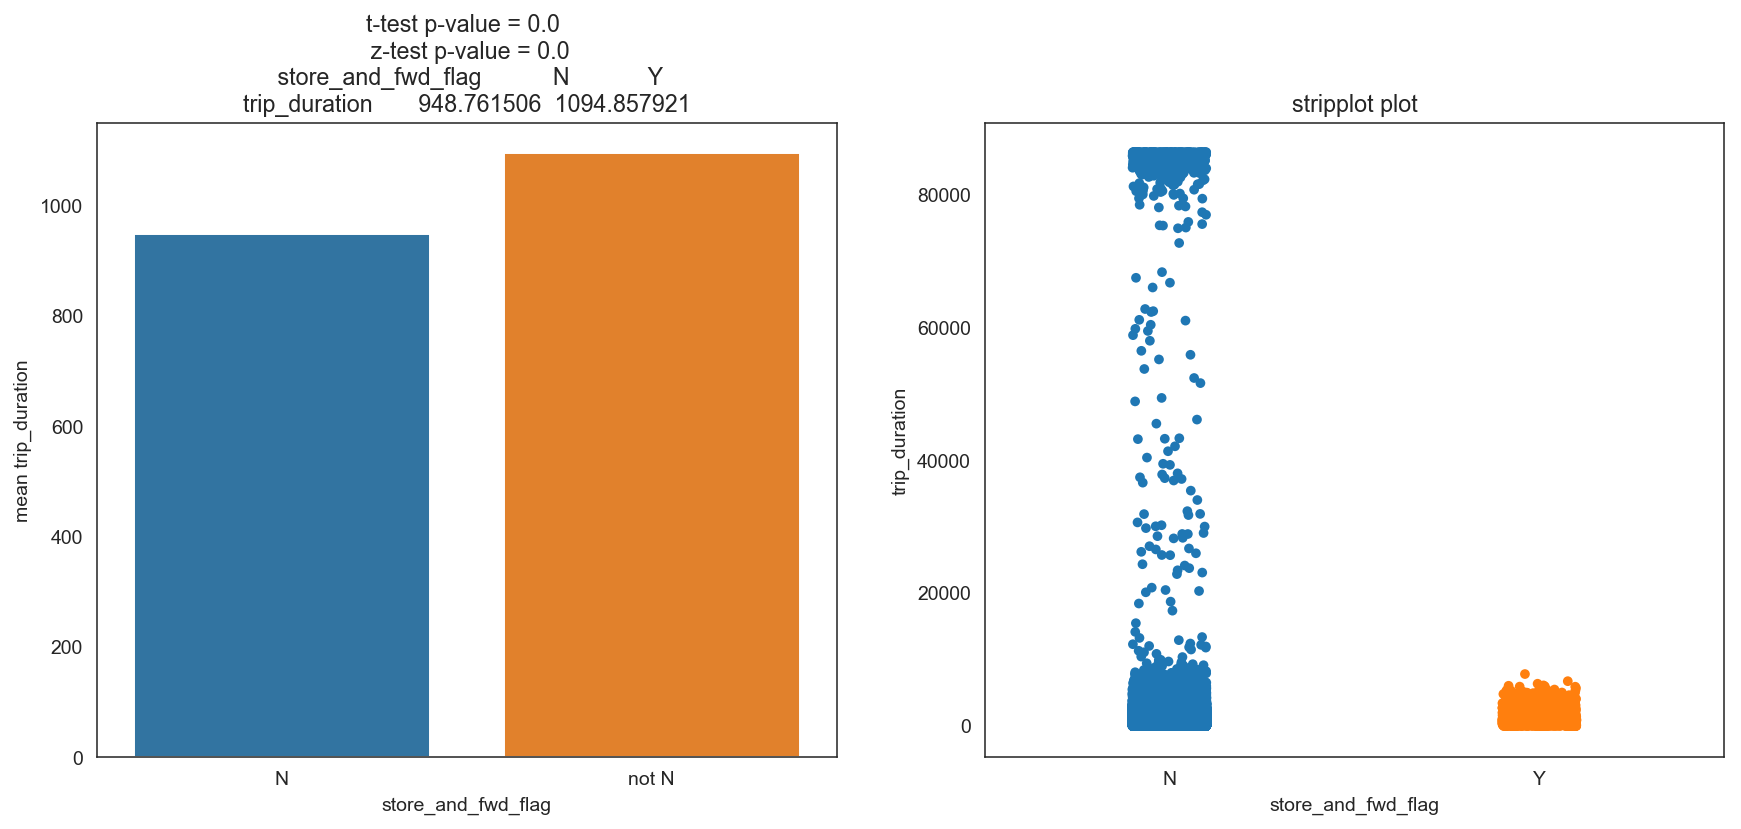

In [70]:
BVA_cont_cat(data, 'trip_duration', 'store_and_fwd_flag', 'N')

#### Result:
* Yes, there is significant difference between store_and_fwd_flag.
* From the barploat, it seems that avg. trip duration for the trips where the flag is stored is more than where the flag is not stored.
* According to the stripplot on the right, the flag is stored only for the short trips but these trips are longer than the avg. trip duration where the flag is not stored (Can be inferred through the barplot).

### Is there any difference between different passenger_count categories for avg. trip duration?

In [71]:
def BVA_cat_cont(data, cont, cat, pval):
    
    # p-value for 1 way anova 
    pvalue = pval
    
    # pivot table for distribution
    # table
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc= np.mean)
    
    # plotting
    plt.figure(figsize = (15,6), dpi=140)
    
    #barplot 
    plt.subplot(1,2,1)
    sns.barplot(x=cat, y=cont, data=data)
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(cat)
    plt.title('1 way anova: {} \n {}'.format(pvalue,round(table,2)))
    
    #boxplot
    plt.subplot(1,2,2)
    sns.stripplot(x=cat, y=cont, data=data)
    plt.title('strip plot')

In [72]:
# 1-way anova test for passenger_count
new = {}
for i in range(0,7):
    new[i] = list = data[data['passenger_count'] == i]['trip_duration'].tolist()
    
from scipy.stats import f_oneway
pvalue = f_oneway(new[0],new[1],new[2],new[3],new[4],new[5],new[6])[1]

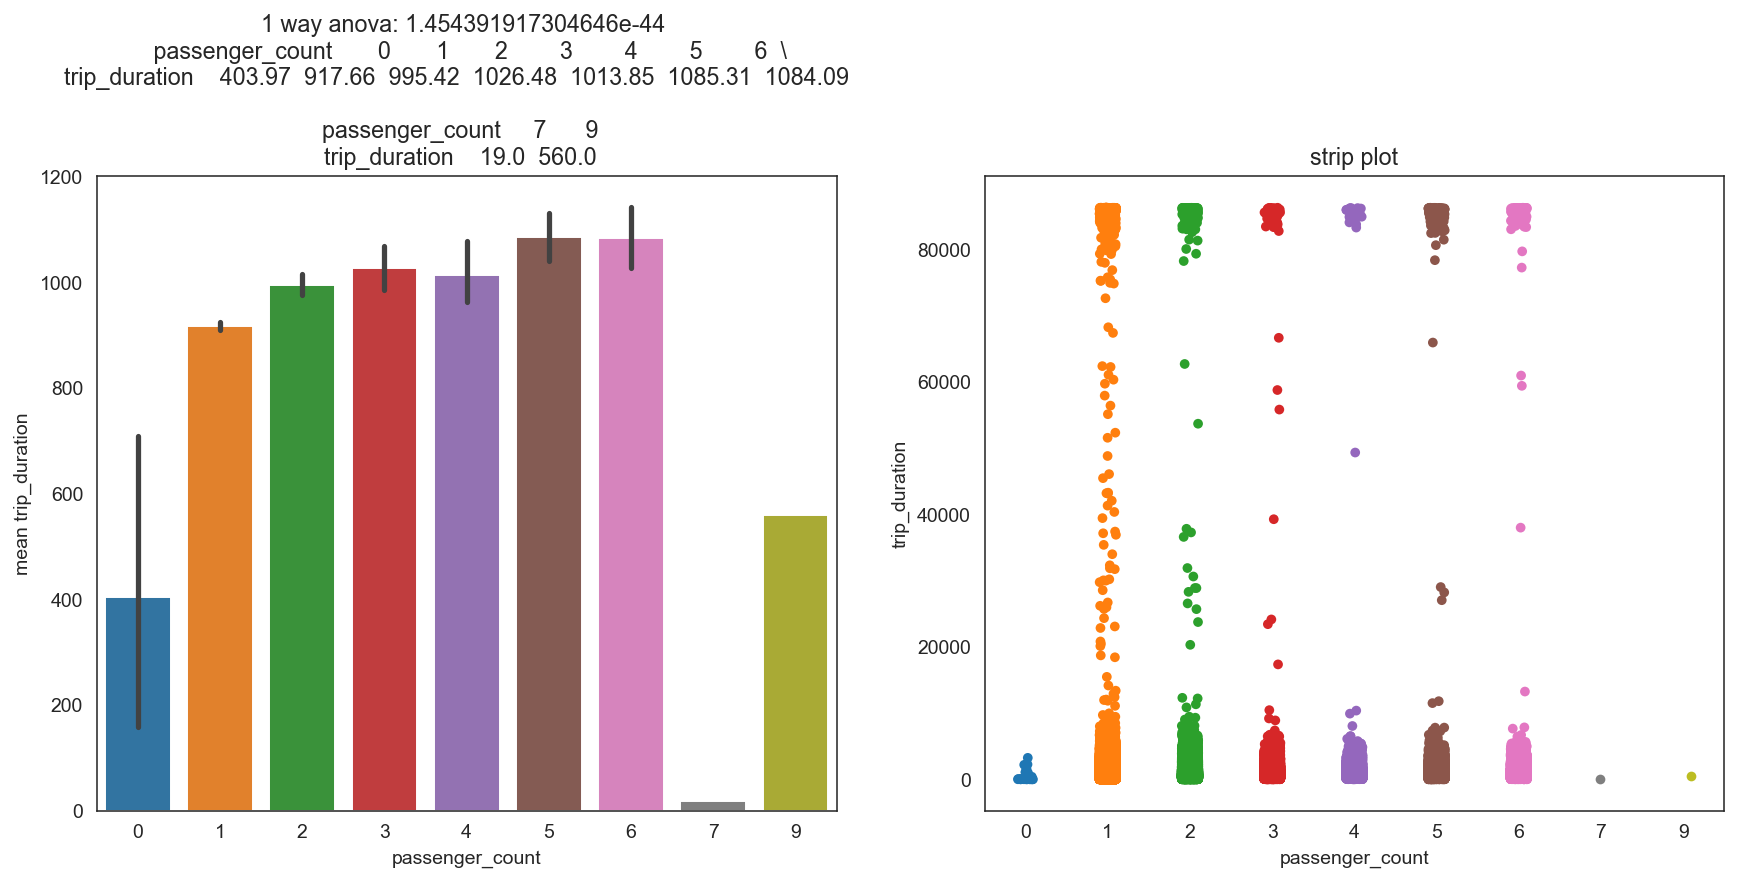

In [73]:
BVA_cat_cont(data,'trip_duration','passenger_count',pvalue)

#### Observations:
* Yes, the difference in avg. trip duraton for different passangers is statistically different.
* The avg. trip duration is highest for 5 passanger rides.
* The avg. trip duration is lowest for 0 passanger rides.
* For passenger count 7 and 9, we have only 1 data points available.

### Is there any difference between avg. trip duration for different months?

In [74]:
# 1-way anova test for different months of year
new = {}
for i in range(1,7):
    new[i] = list = data[data['moy_pickup_datetime'] == i]['trip_duration'].tolist()
    
from scipy.stats import f_oneway
pvalue = f_oneway(new[1],new[2],new[3],new[4],new[5],new[6])[1]

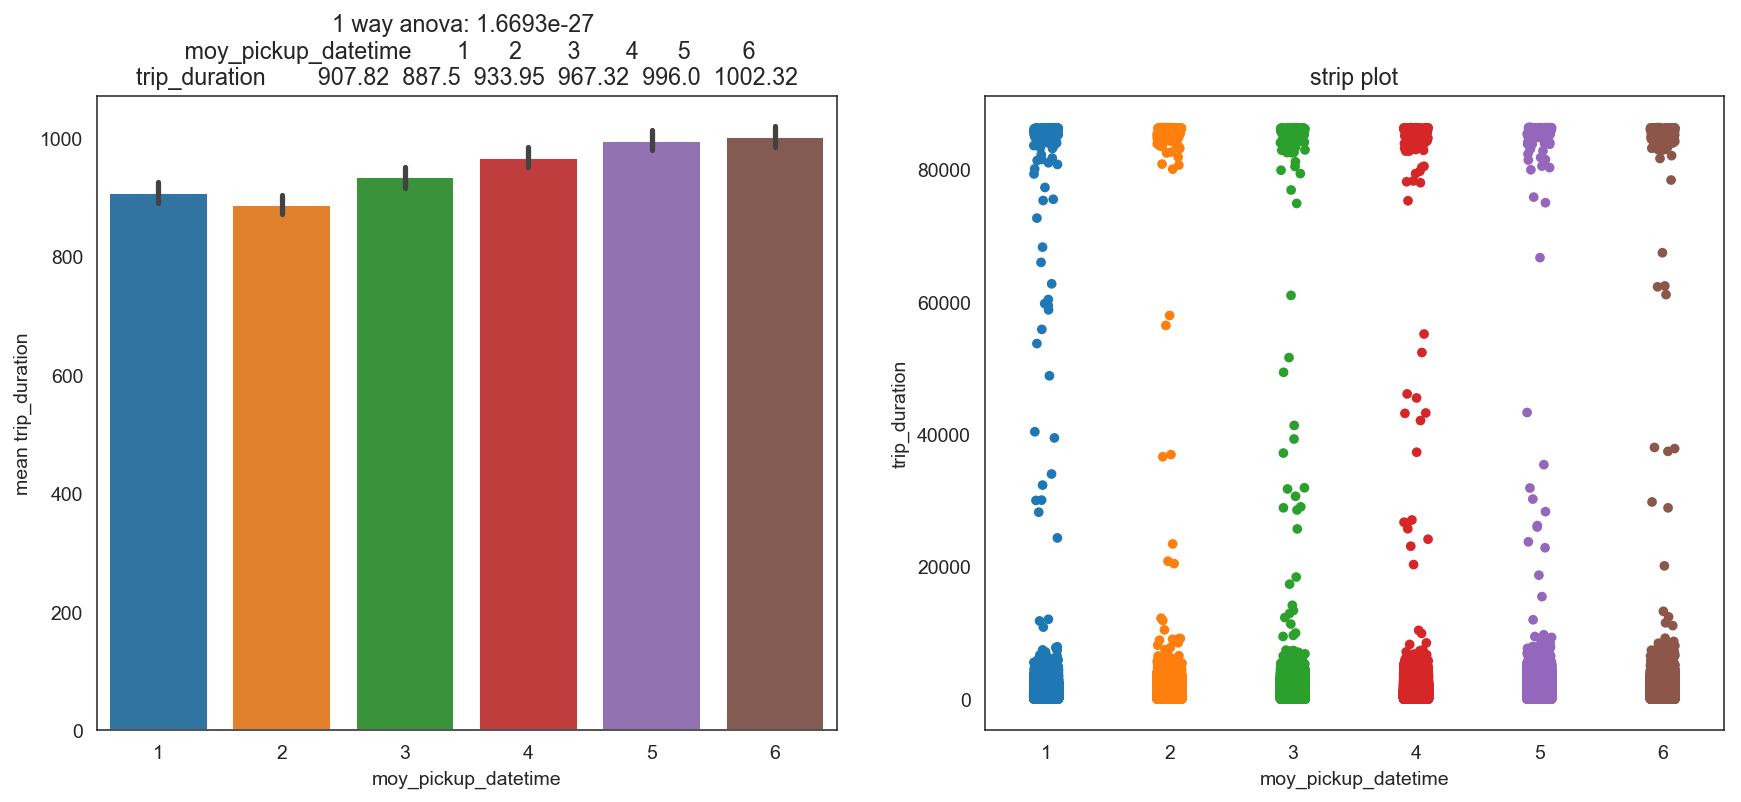

In [75]:
BVA_cat_cont(data, 'trip_duration', 'moy_pickup_datetime', 1.6693e-27)

#### Observations:
* Yes, the difference between avg. trip duration is differnet for each month.
* Avg. trip duration is highest for 6th month.
* Avg. trip duation is lowest for 2nd month.
* Avg. trip duration is increasing each month.

### Is there any difference between avg. trip duration for different days of the week?

In [76]:
# 1-way anova test for days of week 
new = {}
for i in range(0,7):
    new[i] = list = data[data['dow_pickup_datetime'] == i]['trip_duration'].tolist()
    
from scipy.stats import f_oneway
pvalue = f_oneway(new[0],new[1],new[2],new[3],new[4],new[5],new[6])[1]

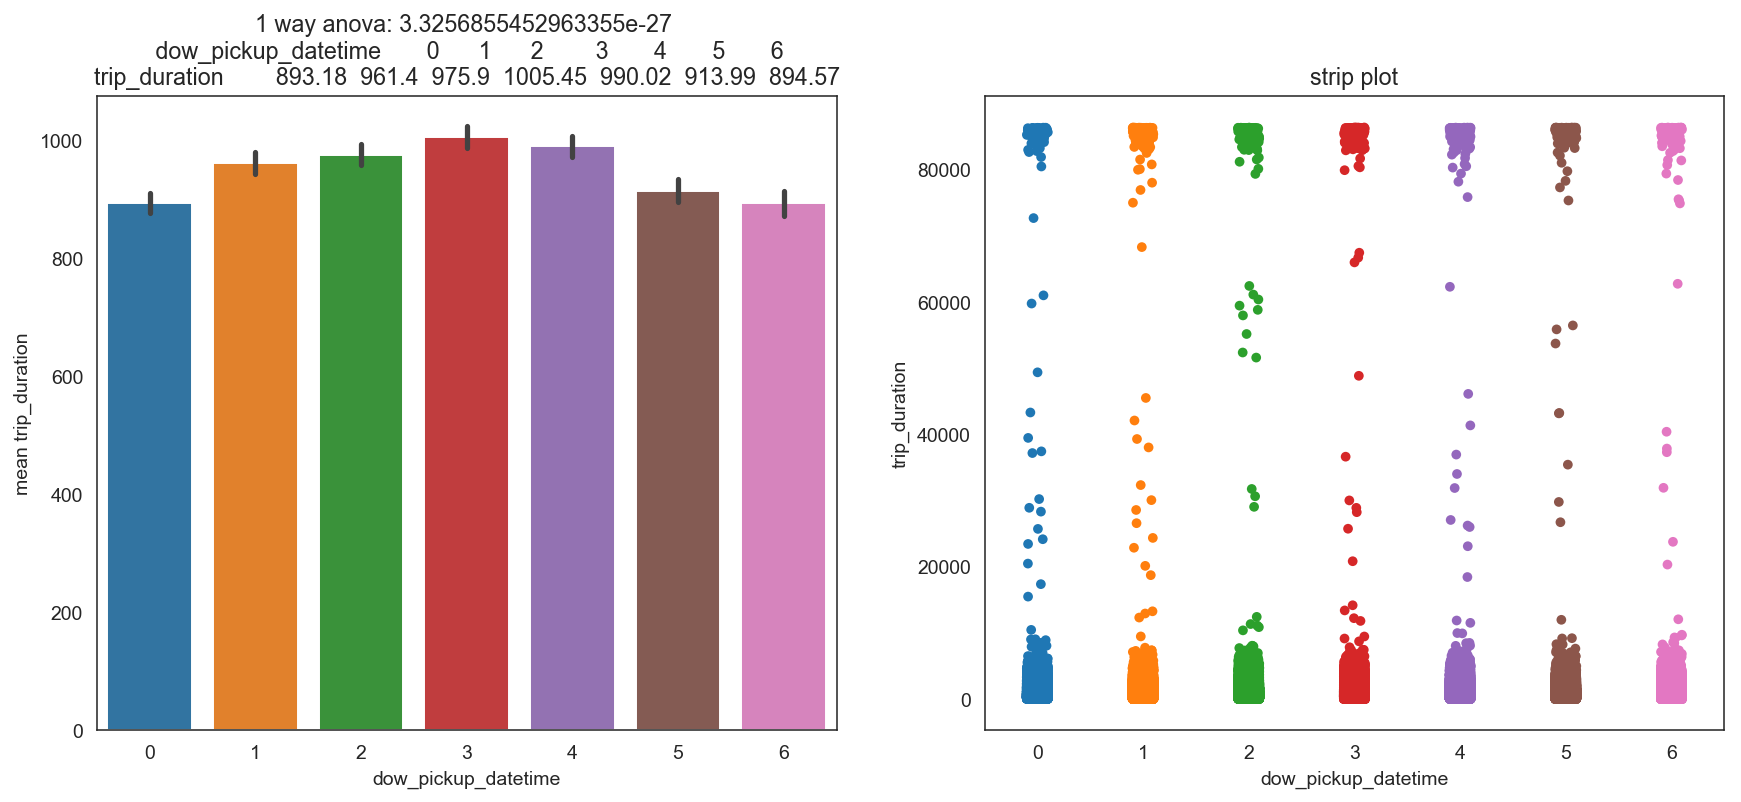

In [77]:
BVA_cat_cont(data,'trip_duration','dow_pickup_datetime', pvalue)

#### Observations:
* Yes, the avg. trip duration between each day of week is statistically different
* Avg. trip duration is highest for thursday.
* Avg. trip duration is lowest for monday.

### Is there any difference between avg. trip duration for different daytime of a day?

In [78]:
# 1-way anova test for daytime of a day
new = {}
for i in ['evening','midday','morning','late night']:
    new[i] = list = data[data['daytime_pickup'] == i]['trip_duration'].tolist()
    
from scipy.stats import f_oneway
pvalue = f_oneway(new['evening'],new['midday'],new['morning'],new['late night'])[1]

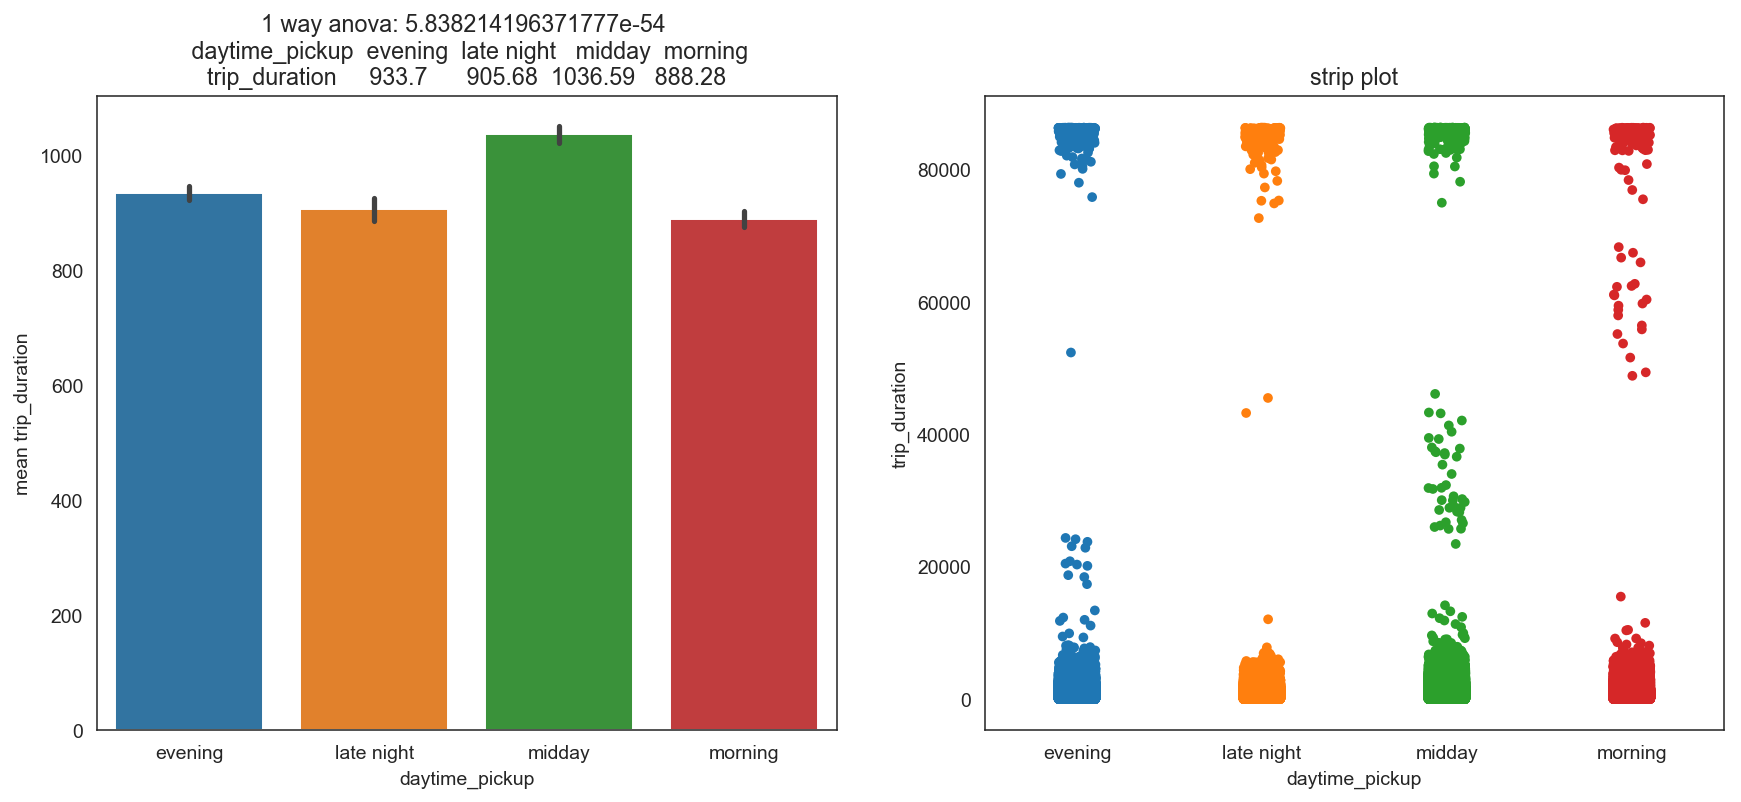

In [79]:
BVA_cat_cont(data, 'trip_duration', 'daytime_pickup',pvalue)

#### Observations:
* Yes, the avg. trip duration for different daytimes of a day is statistically different.
* Avg. trip duration is maximum for late night pickedup trips. 
* Avg. trip duration is minimum for morning pickedup trips

## Multivariate Analysis:

#### Geographic variables and trip duration

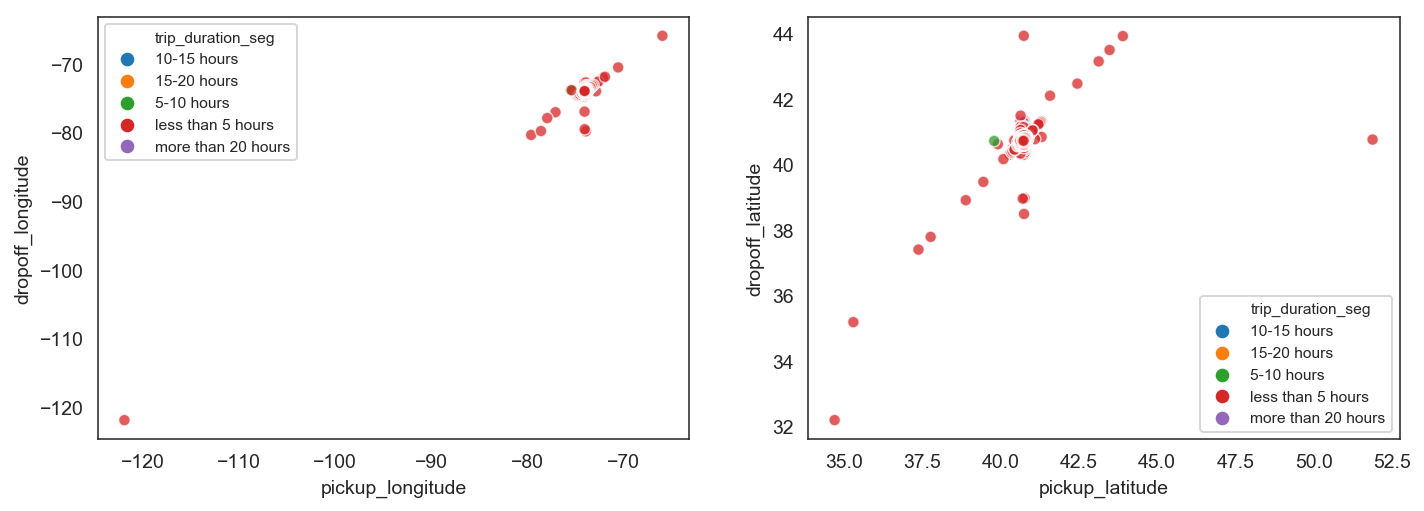

In [80]:
plt.figure(figsize=(12,4), dpi=140)

plt.subplot(1,2,1)
sns.scatterplot(x='pickup_longitude', y='dropoff_longitude', data= data, hue= 'trip_duration_seg', alpha=0.75)
plt.legend(fontsize = 8)

plt.subplot(1,2,2)
sns.scatterplot(x= 'pickup_latitude', y='dropoff_latitude', data= data, hue= 'trip_duration_seg', alpha=0.75)
plt.legend(fontsize= 8)

#### Observation:
* **Longitude**:
    * The trip duration less than 5 hours have longitude in between -80 to -70.
    * All the other time durations are aggregated at -74.
* **Latitude**:
    * The trip duration less than 5 hours have latitude deviated between 35 to 45.
    * All the other time turations are concentrated at 40 to 42.5.

(35, 54)

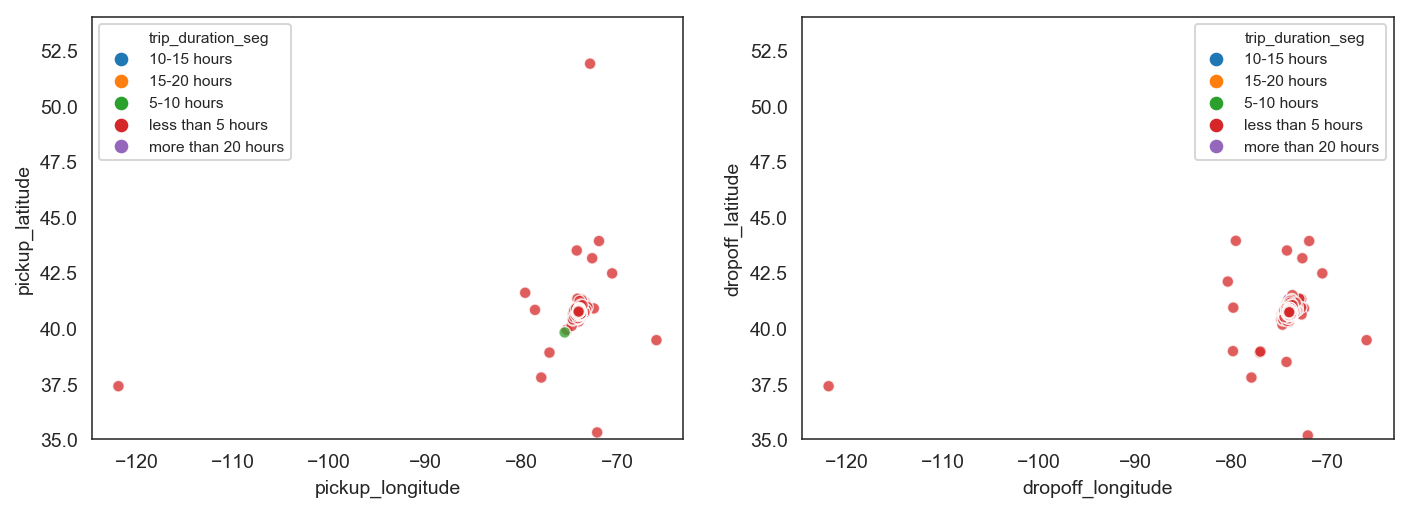

In [81]:
plt.figure(figsize=(12,4), dpi=140)

plt.subplot(1,2,1)
sns.scatterplot(x='pickup_longitude', y= 'pickup_latitude', data= data, hue= 'trip_duration_seg', alpha=0.75)
plt.legend(fontsize = 8)
plt.ylim(35, 54)

plt.subplot(1,2,2)
sns.scatterplot(x= 'dropoff_longitude', y='dropoff_latitude', data= data, hue= 'trip_duration_seg', alpha=0.75)
plt.legend(fontsize= 8)
plt.ylim(35, 54)

#### Observations:
* pickup and dropoff loactions are very close to each other.
* It is safe to say, mostly the cabs has been picked and dropped in New York City only.

## Conclusion for Trip Duration:
* Majority of the trips are short (less than 5 hours) with slight deviation upto 23 hours.
* Continiuous variables have very low correlation with the trip duration.
* Vedor 2 is prefered for extended cab rides.
* Most cab are ridden with 1 customers but avg. trip duration is largest for passanger count 5.
* Avg. trip duration where flag is stored is more than where flag is not stored but for longer trip durations flag usually doesn't get stored.
* Most cabs are ridden on Friday and least are on Monday but the avg trip duration for cabs ridden is highest for Thursday.
* Most cabs are ridden in March and least in January but the avg. trip duartion for cabs riiden is highest for June.
* The avg. trip duration is increasing month wise.
* Most cabs are ridden in evening time and least in night time but the avg. trip duration for night time is highest.
* Only cabs with trip duration less than 5 hours have slight deviation in cordinates, else for the rest trips the loaction is more inclined towards cordinates 40, -74.  
* Majority of cabs picked and dropped are within New York City.
